In [ ]:
from google.colab import files

# Upload the file from your local system
uploaded = files.upload()


Saving 001_mammalData.csv to 001_mammalData.csv


In [ ]:
!ls


001_mammalData.csv  sample_data  wildlife_map_with_icons.html  wildlife_map_with_tooltips.html


**DATA PRE PROCESSSING**

Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

# Load the uploaded dataset
file_path = "001_mammalData.csv"  # File is now in Colab's root directory
animal_data = pd.read_csv(file_path)

# Display the first few rows
print(animal_data.head())
print(animal_data.tail())
print(animal_data.info())

              recordedBy   eventDate       eventTime  decimalLatitude  \
0          Sanath, Vijay  16/05/2022  18:45:00+05:30        12.927697   
1  Sanath, Vijay, Orvill  16/05/2022  18:48:00+05:30        12.927748   
2        Sanath, Ranjith  16/05/2022  18:49:00+05:30        12.927711   
3  Sanath, Vijay, Sanjay  23/06/2022  10:22:00+05:30        12.919011   
4    Sanath, Vijay Kumar  11/08/2022  19:20:00+05:30        12.908552   

   decimalLongitude  verbatimElevation  coordinateUncertaintyInMeters  \
0         75.653534         851.518484                          8.000   
1         75.653438         871.023441                         12.000   
2         75.653508         863.140736                         12.000   
3         75.648855         871.632854                          6.774   
4         75.662697         918.713265                          6.000   

  verbatimLocality     habitat   verbatimIdentification  individualCount  \
0       doraigundi        Edge        malabar_

Check for missing values

In [ ]:
animal_data.isnull().sum()

,0
recordedBy,0
eventDate,0
eventTime,0
decimalLatitude,0
decimalLongitude,0
verbatimElevation,98
coordinateUncertaintyInMeters,0
verbatimLocality,0
habitat,0
verbatimIdentification,0


Dropping columns "verbatimElevation", "occurenceRemarks" and "assocatedMedia" as they are not needed.

In [ ]:
# Code to drop them:

In [ ]:
animal_data = animal_data.drop(['verbatimElevation','occurrenceRemarks', 'associatedMedia', ], axis=1)

In [ ]:
animal_data = animal_data.drop('coordinateUncertaintyInMeters', axis=1)

In [ ]:
animal_data.isnull().sum()

,0
recordedBy,0
eventDate,0
eventTime,0
decimalLatitude,0
decimalLongitude,0
verbatimLocality,0
habitat,0
verbatimIdentification,0
individualCount,0
occurrenceID,0


Checking for duplicates

In [ ]:
# Check for duplicate rows
duplicate_rows = animal_data.duplicated()
print(duplicate_rows)
num_duplicate_rows = duplicate_rows.sum()
print("Number of duplicate rows:",num_duplicate_rows)

0      False
1      False
2      False
3      False
4      False
       ...  
126    False
127    False
128    False
129    False
130    False
Length: 131, dtype: bool
Number of duplicate rows: 0


Garbage Values

In [ ]:
for i in animal_data.select_dtypes(include="object").columns:
  print(animal_data[i].value_counts())
  print("***"*10)

recordedBy
Vijay Kumar                     18
Manu                            11
Vijay Kumar, Sanath              9
Ranjith, Gowtham                 4
Ranjith                          4
                                ..
Sanath, Vijay, Orvill            1
Sanath, Anand, Ram, Vidhur       1
Vijay Kumar, Ram                 1
Ranjith,Vijay, Sanath, Manu      1
Vijay Kumar, Suman, Abhirami     1
Name: count, Length: 78, dtype: int64
******************************
eventDate
20/11/2022    5
16/12/2022    4
16/05/2022    3
14/04/2023    3
27/11/2022    3
             ..
18/12/2022    1
15/12/2022    1
22/05/2022    1
30/11/2022    1
14/02/2024    1
Name: count, Length: 97, dtype: int64
******************************
eventTime
19:00:00+05:30    3
19:17:00+05:30    3
17:06:00+05:30    2
17:08:00+05:30    2
19:01:00+05:30    2
                 ..
10:15:00+05:30    1
12:42:00+05:30    1
20:23:00+05:30    1
20:06:00+05:30    1
19:40:00+05:30    1
Name: count, Length: 120, dtype: int64
***********

No garbage values found

Unique values

In [ ]:
print(animal_data.nunique())

recordedBy                 78
eventDate                  97
eventTime                 120
decimalLatitude            61
decimalLongitude           61
verbatimLocality           29
habitat                     8
verbatimIdentification     28
individualCount             8
occurrenceID              131
vernacularName             28
scientificName             28
dtype: int64


Exploratory Data Analysis

In [ ]:
#descriptive statistics
animal_data.describe()

,decimalLatitude,decimalLongitude,individualCount
count,131.000000,131.000000,131.000000
mean,12.920268,75.658596,1.549618
std,0.014442,0.011567,1.861405
min,12.814717,75.646684,1.000000
25%,12.911993,75.650986,1.000000
50%,12.925535,75.655674,1.000000
75%,12.930922,75.663767,1.000000
max,12.937414,75.732606,18.000000


In [ ]:
#descriptive statistics of numerical columns
animal_data.describe().T

,count,mean,std,min,25%,50%,75%,max
decimalLatitude,131.0,12.920268,0.014442,12.814717,12.911993,12.925535,12.930922,12.937414
decimalLongitude,131.0,75.658596,0.011567,75.646684,75.650986,75.655674,75.663767,75.732606
individualCount,131.0,1.549618,1.861405,1.000000,1.000000,1.000000,1.000000,18.000000


In [ ]:
#descriptive statistics of object columns
animal_data.describe(include="object")

,recordedBy,eventDate,eventTime,verbatimLocality,habitat,verbatimIdentification,occurrenceID,vernacularName,scientificName
count,131,131,131,131,131,131,131,131,131
unique,78,97,120,29,8,28,131,28,28
top,Vijay Kumar,20/11/2022,19:00:00+05:30,kt_vg_road,Rainforest,Barking_Deer,urn:ncf:arp:mammals:uuid:ad59af22-5b51-4374-91...,Indian muntjac,Muntiacus muntjac
freq,18,5,3,16,39,24,1,24,24


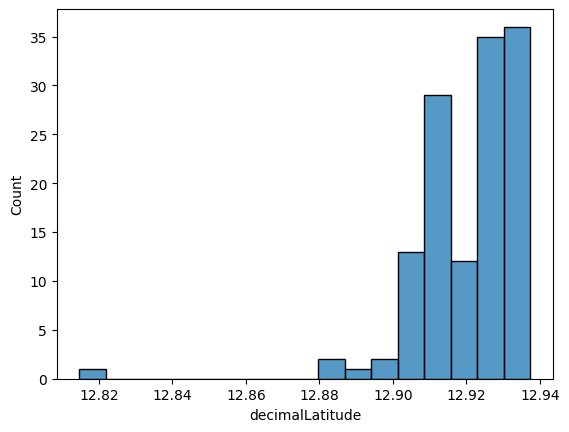

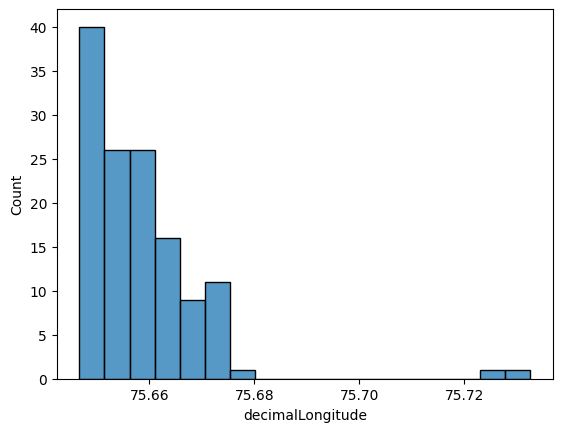

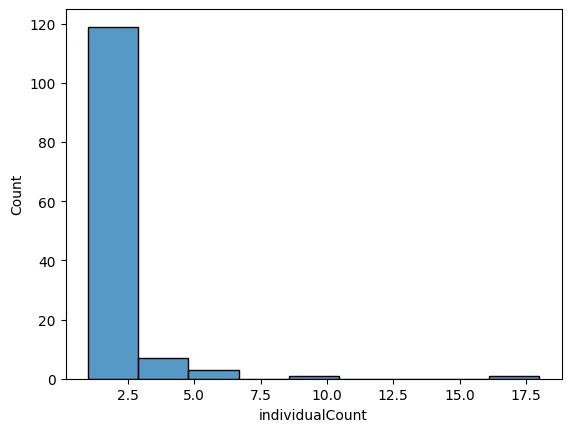

In [ ]:
#Histogram to understand the distribution
import warnings
warnings.filterwarnings("ignore")
for i in animal_data.select_dtypes(include="number").columns:
  sns.histplot(data=animal_data,x=i)
  plt.show()

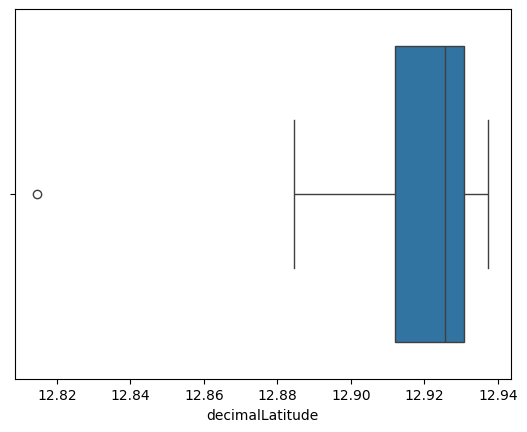

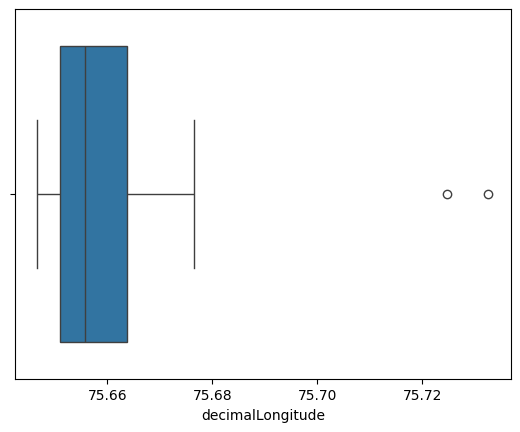

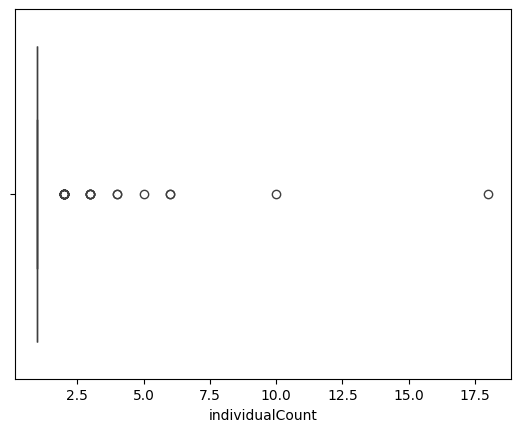

In [ ]:
#Boxplot to identify Outliers
import warnings
warnings.filterwarnings("ignore")
for i in animal_data.select_dtypes(include="number").columns:
  sns.boxplot(data=animal_data,x=i)
  plt.show()


In [ ]:
#Scatter plot to understand the relationship [Bivariate Analysis]
#Histogram to understand the distribution
# import warnings
# warnings.filterwarnings("ignore")
# for i in animal_data.select_dtypes(include="number").columns:
#   sns.histplot(data=animal_data,x=i)
#   plt.show()

In [ ]:
#  animal_data.select_dtypes(include="number").columns

Counting outliers

In [ ]:
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outliers
    return ((column < lower_bound) | (column > upper_bound)).sum()

# Example: Checking for outliers in the 'count' column
print("Outliers in 'count':", count_outliers(animal_data['individualCount']))


Outliers in 'count': 28


In [ ]:
# List of numerical columns where outlier detection is relevant
numerical_columns = ['individualCount', 'decimalLongitude', 'decimalLatitude']  # Add more columns if needed

# Check for outliers in each of the numerical columns
outliers = {col: count_outliers(animal_data[col]) for col in numerical_columns}
print(outliers)


{'individualCount': 28, 'decimalLongitude': 2, 'decimalLatitude': 1}


In [ ]:
print(animal_data.columns)

Index(['recordedBy', 'eventDate', 'eventTime', 'decimalLatitude',
       'decimalLongitude', 'verbatimLocality', 'habitat',
       'verbatimIdentification', 'individualCount', 'occurrenceID',
       'vernacularName', 'scientificName'],
      dtype='object')


In [ ]:
numerical_summary = animal_data.describe()
print(numerical_summary)


       decimalLatitude  decimalLongitude  individualCount
count       131.000000        131.000000       131.000000
mean         12.920268         75.658596         1.549618
std           0.014442          0.011567         1.861405
min          12.814717         75.646684         1.000000
25%          12.911993         75.650986         1.000000
50%          12.925535         75.655674         1.000000
75%          12.930922         75.663767         1.000000
max          12.937414         75.732606        18.000000


In [ ]:
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((column < lower_bound) | (column > upper_bound)).sum()

# Apply to numerical columns
numerical_columns = animal_data.select_dtypes(include=['number']).columns
outliers = {col: detect_outliers(animal_data[col]) for col in numerical_columns}
print("Outliers in each column:", outliers)


Outliers in each column: {'decimalLatitude': 1, 'decimalLongitude': 2, 'individualCount': 28}


In [ ]:
# Function to detect and cap outliers
def treat_outliers_with_zscore(column, threshold=3):
    z_scores = np.abs((column - column.mean()) / column.std())
    column[z_scores > threshold] = column.clip(lower=column.quantile(0.05), upper=column.quantile(0.95))
    return column

# Apply outlier treatment for the relevant columns
animal_data['decimalLatitude'] = treat_outliers_with_zscore(animal_data['decimalLatitude'])
animal_data['decimalLongitude'] = treat_outliers_with_zscore(animal_data['decimalLongitude'])
animal_data['individualCount'] = treat_outliers_with_zscore(animal_data['individualCount'])

# Display the cleaned data
print(animal_data.head())


              recordedBy   eventDate       eventTime  decimalLatitude  \
0          Sanath, Vijay  16/05/2022  18:45:00+05:30        12.927697   
1  Sanath, Vijay, Orvill  16/05/2022  18:48:00+05:30        12.927748   
2        Sanath, Ranjith  16/05/2022  18:49:00+05:30        12.927711   
3  Sanath, Vijay, Sanjay  23/06/2022  10:22:00+05:30        12.919011   
4    Sanath, Vijay Kumar  11/08/2022  19:20:00+05:30        12.908552   

   decimalLongitude verbatimLocality     habitat   verbatimIdentification  \
0         75.653534       doraigundi        Edge        malabar_pit_Viper   
1         75.653438       doraigundi        Edge                 Wild_pig   
2         75.653508       doraigundi        Edge  Duttaphrynus_parietalis   
3         75.648855  bungalow_mattam  Rainforest   Malabar_Giant_Squirrel   
4         75.662697       kt_vg_road        Road               Mouse_Deer   

   individualCount                                       occurrenceID  \
0              1.0  urn:n

Count of outliers after treatment

In [ ]:
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((column < lower_bound) | (column > upper_bound)).sum()

# Apply to numerical columns
numerical_columns = animal_data.select_dtypes(include=['number']).columns
outliers = {col: detect_outliers(animal_data[col]) for col in numerical_columns}
print("Outliers in each column:", outliers)

Outliers in each column: {'decimalLatitude': 0, 'decimalLongitude': 0, 'individualCount': 28}


In [ ]:
# Calculate Q1, Q3, and IQR for 'individualCount'
Q1 = animal_data['individualCount'].quantile(0.25)
Q3 = animal_data['individualCount'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
animal_data = animal_data[(animal_data['individualCount'] >= lower_bound) & (animal_data['individualCount'] <= upper_bound)]

# Check for remaining outliers
print("Remaining outliers in 'individualCount':", ((animal_data['individualCount'] < lower_bound) | (animal_data['individualCount'] > upper_bound)).sum())


Remaining outliers in 'individualCount': 0


In [ ]:
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((column < lower_bound) | (column > upper_bound)).sum()

# Apply to numerical columns
numerical_columns = animal_data.select_dtypes(include=['number']).columns
outliers = {col: detect_outliers(animal_data[col]) for col in numerical_columns}
print("Outliers in each column:", outliers)

Outliers in each column: {'decimalLatitude': 0, 'decimalLongitude': 0, 'individualCount': 0}


Z-score Normalization

In [ ]:
animal_data.head()

,recordedBy,eventDate,eventTime,decimalLatitude,decimalLongitude,verbatimLocality,habitat,verbatimIdentification,individualCount,occurrenceID,vernacularName,scientificName
0,"Sanath, Vijay",16/05/2022,18:45:00+05:30,12.927697,75.653534,doraigundi,Edge,malabar_pit_Viper,1.0,urn:ncf:arp:mammals:uuid:ad59af22-5b51-4374-91...,Malabar pit viper,Craspedocephalus malabaricus
1,"Sanath, Vijay, Orvill",16/05/2022,18:48:00+05:30,12.927748,75.653438,doraigundi,Edge,Wild_pig,1.0,urn:ncf:arp:mammals:uuid:c52736b4-532d-4e8b-91...,Wild pig,Sus scrofa
2,"Sanath, Ranjith",16/05/2022,18:49:00+05:30,12.927711,75.653508,doraigundi,Edge,Duttaphrynus_parietalis,1.0,urn:ncf:arp:mammals:uuid:c648973a-a724-4c8f-82...,Ridged toad,Duttaphrynus parietalis
3,"Sanath, Vijay, Sanjay",23/06/2022,10:22:00+05:30,12.919011,75.648855,bungalow_mattam,Rainforest,Malabar_Giant_Squirrel,1.0,urn:ncf:arp:mammals:uuid:afb131c3-66a3-4563-87...,Malabar giant squirrel,Ratufa indica
4,"Sanath, Vijay Kumar",11/08/2022,19:20:00+05:30,12.908552,75.662697,kt_vg_road,Road,Mouse_Deer,1.0,urn:ncf:arp:mammals:uuid:392529c3-27b4-4e59-a9...,Indian spotted chevrotain,Moschiola indica


In [ ]:
animal_data.describe()

,decimalLatitude,decimalLongitude,individualCount
count,103.000000,103.000000,103.0
mean,12.920906,75.657804,1.0
std,0.011061,0.007804,0.0
min,12.884422,75.646684,1.0
25%,12.911993,75.650986,1.0
50%,12.925535,75.655434,1.0
75%,12.930864,75.663725,1.0
max,12.937414,75.676466,1.0


In [ ]:
# from sklearn.preprocessing import StandardScaler

# # Initialize the StandardScaler
# scaler = StandardScaler()
# numerical_cols = ['individualCount', 'decimalLongitude', 'decimalLatitude']  # Add more columns if needed

# # Select the columns to standardize (assuming all columns except categorical columns)
# columns_to_standardize = [col for col in animal_data.columns if col in numerical_cols]

# # Fit and transform the selected columns using the scaler
# animal_data[columns_to_standardize] = scaler.fit_transform(animal_data[columns_to_standardize])

# # Display the DataFrame after standardization
# print(animal_data)

In [ ]:
animal_data.describe()

,decimalLatitude,decimalLongitude,individualCount
count,103.000000,103.000000,103.0
mean,12.920906,75.657804,1.0
std,0.011061,0.007804,0.0
min,12.884422,75.646684,1.0
25%,12.911993,75.650986,1.0
50%,12.925535,75.655434,1.0
75%,12.930864,75.663725,1.0
max,12.937414,75.676466,1.0


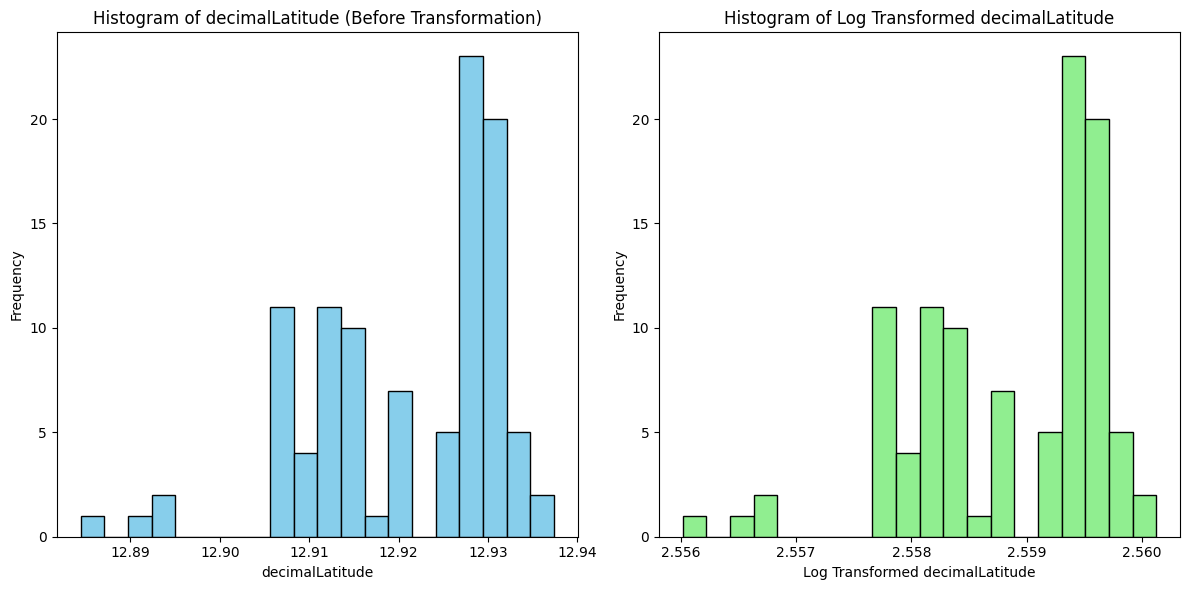

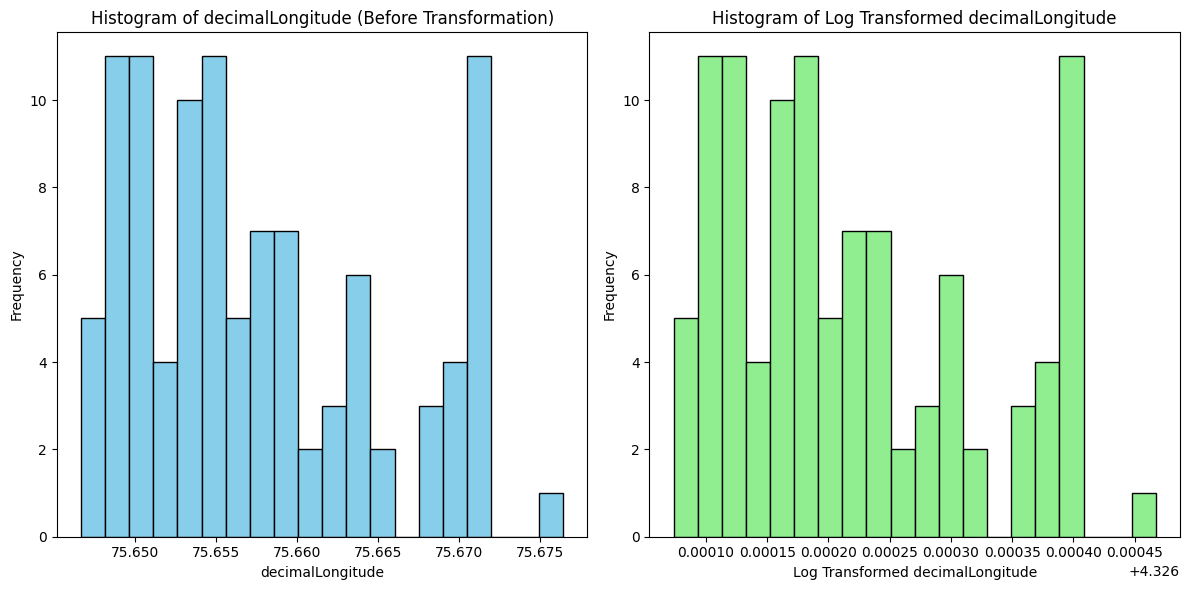

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing 'avg_glucose_level' and 'bmi' attributes

# Perform log transformation
animal_data['log_decimalLatitude'] = np.log(animal_data['decimalLatitude'])
animal_data['log_decimalLongitude'] = np.log(animal_data['decimalLongitude'])

# Plot histograms before and after transformation
plt.figure(figsize=(12, 6))

# Histogram before transformation
plt.subplot(1, 2, 1)
plt.hist(animal_data['decimalLatitude'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of decimalLatitude (Before Transformation)')
plt.xlabel('decimalLatitude')
plt.ylabel('Frequency')

# Histogram after transformation
plt.subplot(1, 2, 2)
plt.hist(animal_data['log_decimalLatitude'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Log Transformed decimalLatitude')
plt.xlabel('Log Transformed decimalLatitude')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Histogram before transformation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(animal_data['decimalLongitude'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of decimalLongitude (Before Transformation)')
plt.xlabel('decimalLongitude')
plt.ylabel('Frequency')

# Histogram after transformation
plt.subplot(1, 2, 2)
plt.hist(animal_data['log_decimalLongitude'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Log Transformed decimalLongitude')
plt.xlabel('Log Transformed decimalLongitude')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

# # Histogram before transformation
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.hist(animal_data['individualCount'],  color='skyblue', edgecolor='black')
# plt.title('Histogram of individualCount (Before Transformation)')
# plt.xlabel('individualCount')
# plt.ylabel('Frequency')

# # Histogram after transformation
# plt.subplot(1, 2, 2)
# plt.hist(animal_data['log_individualCount'], color='lightgreen', edgecolor='black')
# plt.title('Histogram of Log Transformed individualCount')
# plt.xlabel('Log Transformed individualCount')
# plt.ylabel('Frequency')


# plt.tight_layout()
# plt.show()



In [ ]:
animal_data.head()

,recordedBy,eventDate,eventTime,decimalLatitude,decimalLongitude,verbatimLocality,habitat,verbatimIdentification,individualCount,occurrenceID,vernacularName,scientificName,log_decimalLatitude,log_decimalLongitude
0,"Sanath, Vijay",16/05/2022,18:45:00+05:30,12.927697,75.653534,doraigundi,Edge,malabar_pit_Viper,1.0,urn:ncf:arp:mammals:uuid:ad59af22-5b51-4374-91...,Malabar pit viper,Craspedocephalus malabaricus,2.559372,4.326164
1,"Sanath, Vijay, Orvill",16/05/2022,18:48:00+05:30,12.927748,75.653438,doraigundi,Edge,Wild_pig,1.0,urn:ncf:arp:mammals:uuid:c52736b4-532d-4e8b-91...,Wild pig,Sus scrofa,2.559376,4.326163
2,"Sanath, Ranjith",16/05/2022,18:49:00+05:30,12.927711,75.653508,doraigundi,Edge,Duttaphrynus_parietalis,1.0,urn:ncf:arp:mammals:uuid:c648973a-a724-4c8f-82...,Ridged toad,Duttaphrynus parietalis,2.559373,4.326164
3,"Sanath, Vijay, Sanjay",23/06/2022,10:22:00+05:30,12.919011,75.648855,bungalow_mattam,Rainforest,Malabar_Giant_Squirrel,1.0,urn:ncf:arp:mammals:uuid:afb131c3-66a3-4563-87...,Malabar giant squirrel,Ratufa indica,2.558700,4.326102
4,"Sanath, Vijay Kumar",11/08/2022,19:20:00+05:30,12.908552,75.662697,kt_vg_road,Road,Mouse_Deer,1.0,urn:ncf:arp:mammals:uuid:392529c3-27b4-4e59-a9...,Indian spotted chevrotain,Moschiola indica,2.557890,4.326285


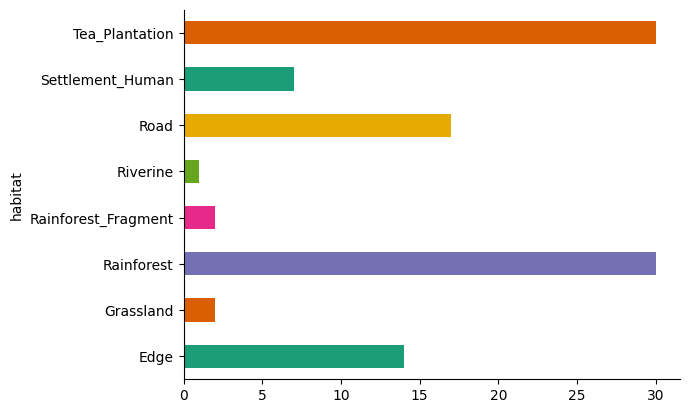

In [ ]:
# @title habitat

from matplotlib import pyplot as plt
import seaborn as sns
animal_data.groupby('habitat').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
preprocessed_data=animal_data

In [ ]:
preprocessed_data.head()

,recordedBy,eventDate,eventTime,decimalLatitude,decimalLongitude,verbatimLocality,habitat,verbatimIdentification,individualCount,occurrenceID,vernacularName,scientificName,log_decimalLatitude,log_decimalLongitude
0,"Sanath, Vijay",16/05/2022,18:45:00+05:30,12.927697,75.653534,doraigundi,Edge,malabar_pit_Viper,1.0,urn:ncf:arp:mammals:uuid:ad59af22-5b51-4374-91...,Malabar pit viper,Craspedocephalus malabaricus,2.559372,4.326164
1,"Sanath, Vijay, Orvill",16/05/2022,18:48:00+05:30,12.927748,75.653438,doraigundi,Edge,Wild_pig,1.0,urn:ncf:arp:mammals:uuid:c52736b4-532d-4e8b-91...,Wild pig,Sus scrofa,2.559376,4.326163
2,"Sanath, Ranjith",16/05/2022,18:49:00+05:30,12.927711,75.653508,doraigundi,Edge,Duttaphrynus_parietalis,1.0,urn:ncf:arp:mammals:uuid:c648973a-a724-4c8f-82...,Ridged toad,Duttaphrynus parietalis,2.559373,4.326164
3,"Sanath, Vijay, Sanjay",23/06/2022,10:22:00+05:30,12.919011,75.648855,bungalow_mattam,Rainforest,Malabar_Giant_Squirrel,1.0,urn:ncf:arp:mammals:uuid:afb131c3-66a3-4563-87...,Malabar giant squirrel,Ratufa indica,2.558700,4.326102
4,"Sanath, Vijay Kumar",11/08/2022,19:20:00+05:30,12.908552,75.662697,kt_vg_road,Road,Mouse_Deer,1.0,urn:ncf:arp:mammals:uuid:392529c3-27b4-4e59-a9...,Indian spotted chevrotain,Moschiola indica,2.557890,4.326285


In [ ]:
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((column < lower_bound) | (column > upper_bound)).sum()

# Apply to numerical columns
numerical_columns = preprocessed_data.select_dtypes(include=['number']).columns
outliers = {col: detect_outliers(preprocessed_data[col]) for col in numerical_columns}
print("Outliers in each column:", outliers)

Outliers in each column: {'decimalLatitude': 0, 'decimalLongitude': 0, 'individualCount': 0, 'log_decimalLatitude': 0, 'log_decimalLongitude': 0}


In [ ]:
import folium

# Calculate the center of the map
center_lat = preprocessed_data['decimalLatitude'].mean()
center_lon = preprocessed_data['decimalLongitude'].mean()

# Create the map centered at the average coordinates
wildlife_map = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add markers for each animal appearance
for _, row in preprocessed_data.iterrows():
    folium.Marker(
        location=[row['decimalLatitude'], row['decimalLongitude']],
        popup=(
            f"Animal: {row['vernacularName']}<br>"
            f"Location: {row['verbatimLocality']}<br>"
            f"Habitat: {row['habitat']}"
        ),
        tooltip=row['vernacularName']
    ).add_to(wildlife_map)

# Display the map
wildlife_map


Cluster Markers for Better Visualization
When multiple markers are close together, clustering them improves readability.

Code: Add Marker Clustering

In [ ]:
from folium.plugins import MarkerCluster

# Initialize a marker cluster
marker_cluster = MarkerCluster().add_to(wildlife_map)

# Add markers to the cluster
for _, row in preprocessed_data.iterrows():
    folium.Marker(
        location=[row['decimalLatitude'], row['decimalLongitude']],
        popup=(
            f"Animal: {row['vernacularName']}<br>"
            f"Location: {row['verbatimLocality']}<br>"
            f"Habitat: {row['habitat']}"
        ),
        tooltip=row['vernacularName']
    ).add_to(marker_cluster)

# Display the map
wildlife_map


Heatmap for Animal Density
Heatmaps help visualize areas with high densities of animal sightings.

Code: Add a Heatmap

In [ ]:
from folium.plugins import HeatMap

# Extract lat-long data for the heatmap
heat_data = preprocessed_data[['decimalLatitude', 'decimalLongitude']].values.tolist()

# Add the heatmap to the map
HeatMap(heat_data).add_to(wildlife_map)

# Display the map
wildlife_map


 Differentiate Markers by Habitat
Color-code markers based on the habitat column to categorize sightings.

Code: Color-Code Markers

In [ ]:
# Define colors for each habitat type
habitat_colors = {
    "Edge": "green",
    "Rainforest": "blue",
    "Road": "red"
}

# Add color-coded markers
for _, row in preprocessed_data.iterrows():
    folium.Marker(
        location=[row['decimalLatitude'], row['decimalLongitude']],
        popup=(
            f"Animal: {row['vernacularName']}<br>"
            f"Location: {row['verbatimLocality']}<br>"
            f"Habitat: {row['habitat']}"
        ),
        tooltip=row['vernacularName'],
        icon=folium.Icon(color=habitat_colors.get(row['habitat'], "gray"))
    ).add_to(wildlife_map)

# Display the map
wildlife_map


Overlay Polygons or Protected Areas
If you have the boundaries of protected areas or regions prone to poaching, overlay them on the map.

In [ ]:
from folium import Polygon

# Define polygon coordinates
region_boundary = [
    [75.71909227332415, 12.78988958913716],
  [75.71909227332415, 12.97998650310284],
  [75.54193773230853, 12.97998650310284],
  [75.54193773230853, 12.78988958913716]
]

# Add the polygon to the map
folium.Polygon(
    locations=region_boundary,
    color="purple",
    fill=True,
    fill_opacity=0.4,
    popup="Protected Area"
).add_to(wildlife_map)

# Display the map
wildlife_map


Cluster Markers
To reduce clutter when many markers overlap.

In [ ]:
from folium.plugins import MarkerCluster

# Initialize a new map for enhancements
enhanced_map = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Initialize a marker cluster
marker_cluster = MarkerCluster().add_to(enhanced_map)

# Add color-coded markers to the cluster
habitat_colors = {
    "Edge": "green",
    "Rainforest": "blue",
    "Road": "red"
}

for _, row in preprocessed_data.iterrows():
    folium.Marker(
        location=[row['decimalLatitude'], row['decimalLongitude']],
        popup=(
            f"Animal: {row['vernacularName']}<br>"
            f"Location: {row['verbatimLocality']}<br>"
            f"Habitat: {row['habitat']}"
        ),
        tooltip=row['vernacularName'],
        icon=folium.Icon(color=habitat_colors.get(row['habitat'], "gray"))
    ).add_to(marker_cluster)


Add a Heatmap
Overlay a heatmap to show density of animal appearances.


In [ ]:
from folium.plugins import HeatMap

# Extract lat-long data for the heatmap
heat_data = preprocessed_data[['decimalLatitude', 'decimalLongitude']].values.tolist()

# Add the heatmap layer
HeatMap(heat_data, radius=15, blur=10, gradient={0.4: 'blue', 0.65: 'lime', 1: 'red'}).add_to(enhanced_map)


In [ ]:
# Display the enhanced map
enhanced_map

# Save the map to an HTML file


AttributeError: 'float' object has no attribute 'split'

In [ ]:
# Check the data types of the habitat column
print(preprocessed_data['habitat'].unique())


['Edge' 'Rainforest' 'Road' 'Tea_Plantation' 'Settlement_Human'
 'Rainforest_Fragment' 'Grassland' 'Riverine']


In [ ]:
habitat_colors = {
    "Edge": "green",
    "Rainforest": "blue",
    "Road": "red",
    "Tea_Plantation": "purple",
    "Settlement_Human": "orange",
    "Rainforest_Fragment": "pink",
    "Grassland": "lightgreen",
    "Riverine": "darkblue",
}
default_color = "gray"


In [ ]:
for _, row in preprocessed_data.iterrows():
    habitat = row['habitat']
    color = habitat_colors.get(habitat, default_color)  # Use default color if not in dictionary
    print(f"Habitat: {habitat}, Color: {color}")  # Debug info

    folium.Marker(
        location=[row['decimalLatitude'], row['decimalLongitude']],
        popup=(
            f"Animal: {row['vernacularName']}<br>"
            f"Location: {row['verbatimLocality']}<br>"
            f"Habitat: {habitat}"
        ),
        tooltip=row['vernacularName'],
        icon=folium.Icon(color=color)
    ).add_to(marker_cluster)


Habitat: Edge, Color: green
Habitat: Edge, Color: green
Habitat: Edge, Color: green
Habitat: Rainforest, Color: blue
Habitat: Road, Color: red
Habitat: Road, Color: red
Habitat: Road, Color: red
Habitat: Tea_Plantation, Color: purple
Habitat: Road, Color: red
Habitat: Road, Color: red
Habitat: Rainforest, Color: blue
Habitat: Road, Color: red
Habitat: Settlement_Human, Color: orange
Habitat: Road, Color: red
Habitat: Settlement_Human, Color: orange
Habitat: Tea_Plantation, Color: purple
Habitat: Rainforest, Color: blue
Habitat: Tea_Plantation, Color: purple
Habitat: Tea_Plantation, Color: purple
Habitat: Rainforest, Color: blue
Habitat: Tea_Plantation, Color: purple
Habitat: Rainforest, Color: blue
Habitat: Edge, Color: green
Habitat: Rainforest, Color: blue
Habitat: Edge, Color: green
Habitat: Settlement_Human, Color: orange
Habitat: Tea_Plantation, Color: purple
Habitat: Rainforest, Color: blue
Habitat: Road, Color: red
Habitat: Rainforest_Fragment, Color: pink
Habitat: Tea_Plantatio

In [ ]:
print(preprocessed_data[['decimalLatitude', 'decimalLongitude']].dtypes)
print(preprocessed_data[['decimalLatitude', 'decimalLongitude']].head())


decimalLatitude     float64
decimalLongitude    float64
dtype: object
   decimalLatitude  decimalLongitude
0        12.927697         75.653534
1        12.927748         75.653438
2        12.927711         75.653508
3        12.919011         75.648855
4        12.908552         75.662697


In [ ]:
for _, row in preprocessed_data.iterrows():
    habitat = row['habitat']
    vernacular_name = row['vernacularName']
    locality = row['verbatimLocality']
    lat = row['decimalLatitude']
    lon = row['decimalLongitude']
    color = habitat_colors.get(habitat, default_color)  # Ensure color mapping works

    # Debugging
    print(f"Lat: {lat}, Lon: {lon}, Habitat: {habitat}, Color: {color}, VernacularName: {vernacular_name}")


Lat: 12.9276969, Lon: 75.6535336, Habitat: Edge, Color: green, VernacularName: Malabar pit viper
Lat: 12.9277477, Lon: 75.6534381, Habitat: Edge, Color: green, VernacularName: Wild pig
Lat: 12.9277108, Lon: 75.6535083, Habitat: Edge, Color: green, VernacularName: Ridged toad
Lat: 12.9190108, Lon: 75.6488546, Habitat: Rainforest, Color: blue, VernacularName: Malabar giant squirrel
Lat: 12.9085519, Lon: 75.6626966, Habitat: Road, Color: red, VernacularName: Indian spotted chevrotain
Lat: 12.9285055, Lon: 75.6556742, Habitat: Road, Color: red, VernacularName: Indian muntjac
Lat: 12.9308058, Lon: 75.6593755, Habitat: Road, Color: red, VernacularName: Nilgiri keelback
Lat: 12.911685, Lon: 75.659637, Habitat: Tea_Plantation, Color: purple, VernacularName: Stripe-necked mongoose
Lat: 12.906975, Lon: 75.6633767, Habitat: Road, Color: red, VernacularName: Malabar pit viper
Lat: 12.914203, Lon: 75.668728, Habitat: Road, Color: red, VernacularName: Indian muntjac
Lat: 12.937414, Lon: 75.663012, H

In [ ]:
for _, row in preprocessed_data.iterrows():
    color = habitat_colors.get(row['habitat'], default_color)
    folium.Marker(
        location=[row['decimalLatitude'], row['decimalLongitude']],
        popup=(
            f"Animal: {row['vernacularName']}<br>"
            f"Location: {row['verbatimLocality']}<br>"
            f"Habitat: {row['habitat']}"
        ),
        tooltip=str(row['vernacularName']),  # Ensure tooltip is a string
        icon=folium.Icon(color=color)       # Ensure color is valid
    ).add_to(marker_cluster)


In [ ]:
import folium
from folium.plugins import MarkerCluster

# Define habitat colors
habitat_colors = {
    "Edge": "green",
    "Rainforest": "blue",
    "Road": "red",
    "Tea_Plantation": "purple",
    "Settlement_Human": "orange",
    "Rainforest_Fragment": "pink",
    "Grassland": "lightgreen",
    "Riverine": "darkblue",
}
default_color = "gray"

# Fill missing values for 'vernacularName' and 'habitat' with 'Unknown'
preprocessed_data = preprocessed_data.fillna({"vernacularName": "Unknown", "habitat": "Unknown"})

# Debugging: Check unique habitats and color mapping
print(preprocessed_data['habitat'].unique())

# Create base map
base_map = folium.Map(location=[preprocessed_data['decimalLatitude'].mean(), preprocessed_data['decimalLongitude'].mean()],
                      zoom_start=13)

# Add marker cluster
marker_cluster = MarkerCluster().add_to(base_map)

# Add markers
for _, row in preprocessed_data.iterrows():
    try:
        habitat = row['habitat']
        vernacular_name = str(row['vernacularName'])  # Ensure it's a string
        locality = str(row['verbatimLocality'])       # Ensure it's a string
        lat = row['decimalLatitude']
        lon = row['decimalLongitude']
        color = habitat_colors.get(habitat, default_color)  # Use default color if habitat not in dictionary

        # Debugging: Print marker information
        print(f"Lat: {lat}, Lon: {lon}, Habitat: {habitat}, Color: {color}, VernacularName: {vernacular_name}")

        # Add marker
        folium.Marker(
            location=[lat, lon],
            popup=(
                f"Animal: {vernacular_name}<br>"
                f"Location: {locality}<br>"
                f"Habitat: {habitat}"
            ),
            tooltip=vernacular_name,  # Tooltip for the marker
            icon=folium.Icon(color=color)  # Set icon color
        ).add_to(marker_cluster)
    except Exception as e:
        print(f"Error adding marker for row {row}: {e}")

# Display the map
# base_map.save("wildlife_map.html")  # Save to an HTML file for testing
base_map


['Edge' 'Rainforest' 'Road' 'Tea_Plantation' 'Settlement_Human'
 'Rainforest_Fragment' 'Grassland' 'Riverine']
Lat: 12.9276969, Lon: 75.6535336, Habitat: Edge, Color: green, VernacularName: Malabar pit viper
Lat: 12.9277477, Lon: 75.6534381, Habitat: Edge, Color: green, VernacularName: Wild pig
Lat: 12.9277108, Lon: 75.6535083, Habitat: Edge, Color: green, VernacularName: Ridged toad
Lat: 12.9190108, Lon: 75.6488546, Habitat: Rainforest, Color: blue, VernacularName: Malabar giant squirrel
Lat: 12.9085519, Lon: 75.6626966, Habitat: Road, Color: red, VernacularName: Indian spotted chevrotain
Lat: 12.9285055, Lon: 75.6556742, Habitat: Road, Color: red, VernacularName: Indian muntjac
Lat: 12.9308058, Lon: 75.6593755, Habitat: Road, Color: red, VernacularName: Nilgiri keelback
Lat: 12.911685, Lon: 75.659637, Habitat: Tea_Plantation, Color: purple, VernacularName: Stripe-necked mongoose
Lat: 12.906975, Lon: 75.6633767, Habitat: Road, Color: red, VernacularName: Malabar pit viper
Lat: 12.9142

In [ ]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd

# Define habitat colors
habitat_colors = {
    "Edge": "green",
    "Rainforest": "blue",
    "Road": "red",
    "Tea_Plantation": "purple",
    "Settlement_Human": "orange",
    "Rainforest_Fragment": "pink",
    "Grassland": "lightgreen",
    "Riverine": "darkblue",
}
default_color = "gray"

# Fill missing values for 'vernacularName' and 'habitat' with 'Unknown'
preprocessed_data = preprocessed_data.fillna({"vernacularName": "Unknown", "habitat": "Unknown"})

# Debugging: Check unique habitats and color mapping
print(preprocessed_data['habitat'].unique())

# Create base map
base_map = folium.Map(location=[preprocessed_data['decimalLatitude'].mean(), preprocessed_data['decimalLongitude'].mean()],
                      zoom_start=13)

# Add marker cluster
marker_cluster = MarkerCluster().add_to(base_map)

# Add markers with enhanced popup and tooltip
for _, row in preprocessed_data.iterrows():
    try:
        habitat = row['habitat']
        vernacular_name = str(row['vernacularName'])  # Ensure it's a string
        locality = str(row['verbatimLocality'])       # Ensure it's a string
        event_date = row['eventDate']
        event_time = row['eventTime']
        scientific_name = str(row['scientificName'])  # Ensure it's a string
        lat = row['decimalLatitude']
        lon = row['decimalLongitude']
        color = habitat_colors.get(habitat, default_color)  # Use default color if habitat not in dictionary

        # Debugging: Print marker information
        print(f"Lat: {lat}, Lon: {lon}, Habitat: {habitat}, Color: {color}, VernacularName: {vernacular_name}, Event Date: {event_date}, Event Time: {event_time}")

        # Enhanced popup with event date, time, and scientific name
        popup_content = (
            f"<strong>Animal:</strong> {vernacular_name}<br>"
            f"<strong>Scientific Name:</strong> {scientific_name}<br>"
            f"<strong>Location:</strong> {locality}<br>"
            f"<strong>Habitat:</strong> {habitat}<br>"
            f"<strong>Event Date:</strong> {event_date}<br>"
            f"<strong>Event Time:</strong> {event_time}"
        )

        # Add marker with enhanced tooltip and popup
        folium.Marker(
            location=[lat, lon],
            popup=popup_content,
            tooltip=f"{vernacular_name} ({event_date} {event_time})",  # Tooltip shows animal and event time
            icon=folium.Icon(color=color)  # Set icon color
        ).add_to(marker_cluster)
    except Exception as e:
        print(f"Error adding marker for row {row}: {e}")

# Save the map to an HTML file
base_map.save("wildlife_map_with_tooltips.html")
base_map


['Edge' 'Rainforest' 'Road' 'Tea_Plantation' 'Settlement_Human'
 'Rainforest_Fragment' 'Grassland' 'Riverine']
Lat: 12.9276969, Lon: 75.6535336, Habitat: Edge, Color: green, VernacularName: Malabar pit viper, Event Date: 16/05/2022, Event Time: 18:45:00+05:30
Lat: 12.9277477, Lon: 75.6534381, Habitat: Edge, Color: green, VernacularName: Wild pig, Event Date: 16/05/2022, Event Time: 18:48:00+05:30
Lat: 12.9277108, Lon: 75.6535083, Habitat: Edge, Color: green, VernacularName: Ridged toad, Event Date: 16/05/2022, Event Time: 18:49:00+05:30
Lat: 12.9190108, Lon: 75.6488546, Habitat: Rainforest, Color: blue, VernacularName: Malabar giant squirrel, Event Date: 23/06/2022, Event Time: 10:22:00+05:30
Lat: 12.9085519, Lon: 75.6626966, Habitat: Road, Color: red, VernacularName: Indian spotted chevrotain, Event Date: 11/08/2022, Event Time: 19:20:00+05:30
Lat: 12.9285055, Lon: 75.6556742, Habitat: Road, Color: red, VernacularName: Indian muntjac, Event Date: 19/08/2022, Event Time: 10:32:00+05:30

 Adding Animal-Specific Icons
We can create custom icons based on the species (animal) by using images or default symbols with folium.

In [ ]:
import folium
from folium.plugins import MarkerCluster

# Define habitat colors and animal icons (replace with actual icon paths)
habitat_colors = {
    "Edge": "green",
    "Rainforest": "blue",
    "Road": "red",
    "Tea_Plantation": "purple",
    "Settlement_Human": "orange",
    "Rainforest_Fragment": "pink",
    "Grassland": "lightgreen",
    "Riverine": "darkblue",
}
default_color = "gray"

# Animal-specific icons (using URL to image as an example)
animal_icons = {
   "Malabar pit viper": "https://res.cloudinary.com/roundglass/image/upload/w_800,ar_16:9,c_fill,g_auto,f_jpg,f_auto,f_auto/v1564747432/roundglass/sustain/Malabar-Pit-viper_MV-Shreeram_zajoqo.jpg",  # Replace with actual URLs or local paths
#      "Wild pig": "https://example.com/icons/pig.png",
    "Malabar Giant Squirrel": "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTww8UNMCsv9ZZlPIk3hNCcEMcOx07Mm3VV4aryGRQj_7y333wS0MiHWZebVtYnaoDrVuY&usqp=CAU",
#     "Indian spotted chevrotain": "https://example.com/icons/chevrotain.png",
#     "Ridged toad": "https://example.com/icons/toad.png",
#     "Indian pangolin": "https://example.com/icons/pangolin.png",
#     "Leopard": "https://example.com/icons/leopard.png",
#     "Elephant": "https://example.com/icons/elephant.png",
#     "Sloth bear": "https://example.com/icons/sloth_bear.png",
#     "Common leopard": "https://example.com/icons/leopard.png",
#     "Tiger": "https://example.com/icons/tiger.png",
#     "Wild boar": "https://example.com/icons/boar.png",
#     "Indian wolf": "https://example.com/icons/wolf.png",
#     "Peacock": "https://example.com/icons/peacock.png",
#     "Kingfisher": "https://example.com/icons/kingfisher.png",
#     "Mugger crocodile": "https://example.com/icons/crocodile.png",
#     "Brown fish owl": "https://example.com/icons/owl.png",
#     "Indian giant squirrel": "https://example.com/icons/giant_squirrel.png",
#     "Gray langur": "https://example.com/icons/langur.png",
#     "Nilgiri tahr": "https://example.com/icons/tahr.png",
#     "Bonnet macaque": "https://example.com/icons/macaque.png",
#     "Civet cat": "https://example.com/icons/civet.png",
#     "Jackal": "https://example.com/icons/jackal.png",
#     "Indian bison": "https://example.com/icons/gaur.png",
#     "Black-naped hare": "https://example.com/icons/hare.png",
#     "Southern plains gray langur": "https://example.com/icons/langur.png",
#     "Himalayan tahr": "https://example.com/icons/tahr.png",
#     "Wild ass": "https://example.com/icons/ass.png",
#     "Nilgiri langur": "https://example.com/icons/langur.png",
}

# Fill missing values for 'vernacularName' and 'habitat' with 'Unknown'
preprocessed_data = preprocessed_data.fillna({"vernacularName": "Unknown", "habitat": "Unknown"})

# Create base map
base_map = folium.Map(location=[preprocessed_data['decimalLatitude'].mean(), preprocessed_data['decimalLongitude'].mean()],
                      zoom_start=13)

# Add marker cluster
marker_cluster = MarkerCluster().add_to(base_map)

# Add markers with animal-specific icons
for _, row in preprocessed_data.iterrows():
    try:
        habitat = row['habitat']
        vernacular_name = str(row['vernacularName'])  # Ensure it's a string
        locality = str(row['verbatimLocality'])       # Ensure it's a string
        event_date = row['eventDate']
        event_time = row['eventTime']
        scientific_name = str(row['scientificName'])
        lat = row['decimalLatitude']
        lon = row['decimalLongitude']
        color = habitat_colors.get(habitat, default_color)

        # Get animal-specific icon (default if not found)
        icon_url = animal_icons.get(vernacular_name, "https://example.com/icons/default.png")

        # Enhanced popup with event date, time, and scientific name
        popup_content = (
            f"<strong>Animal:</strong> {vernacular_name}<br>"
            f"<strong>Scientific Name:</strong> {scientific_name}<br>"
            f"<strong>Location:</strong> {locality}<br>"
            f"<strong>Habitat:</strong> {habitat}<br>"
            f"<strong>Event Date:</strong> {event_date}<br>"
            f"<strong>Event Time:</strong> {event_time}"
        )

        # Add marker with animal-specific icon
        folium.Marker(
            location=[lat, lon],
            popup=popup_content,
            tooltip=f"{vernacular_name} ({event_date} {event_time})",
            icon=folium.CustomIcon(icon_url, icon_size=(30, 30))  # Use custom icon
        ).add_to(marker_cluster)
    except Exception as e:
        print(f"Error adding marker for row {row}: {e}")

# Save the map to an HTML file
base_map.save("wildlife_map_with_icons.html")
base_map


In [ ]:
preprocessed_data.head()

,recordedBy,eventDate,eventTime,decimalLatitude,decimalLongitude,verbatimLocality,habitat,verbatimIdentification,individualCount,occurrenceID,vernacularName,scientificName,log_decimalLatitude,log_decimalLongitude
0,"Sanath, Vijay",16/05/2022,18:45:00+05:30,12.927697,75.653534,doraigundi,Edge,malabar_pit_Viper,1.0,urn:ncf:arp:mammals:uuid:ad59af22-5b51-4374-91...,Malabar pit viper,Craspedocephalus malabaricus,2.559372,4.326164
1,"Sanath, Vijay, Orvill",16/05/2022,18:48:00+05:30,12.927748,75.653438,doraigundi,Edge,Wild_pig,1.0,urn:ncf:arp:mammals:uuid:c52736b4-532d-4e8b-91...,Wild pig,Sus scrofa,2.559376,4.326163
2,"Sanath, Ranjith",16/05/2022,18:49:00+05:30,12.927711,75.653508,doraigundi,Edge,Duttaphrynus_parietalis,1.0,urn:ncf:arp:mammals:uuid:c648973a-a724-4c8f-82...,Ridged toad,Duttaphrynus parietalis,2.559373,4.326164
3,"Sanath, Vijay, Sanjay",23/06/2022,10:22:00+05:30,12.919011,75.648855,bungalow_mattam,Rainforest,Malabar_Giant_Squirrel,1.0,urn:ncf:arp:mammals:uuid:afb131c3-66a3-4563-87...,Malabar giant squirrel,Ratufa indica,2.558700,4.326102
4,"Sanath, Vijay Kumar",11/08/2022,19:20:00+05:30,12.908552,75.662697,kt_vg_road,Road,Mouse_Deer,1.0,urn:ncf:arp:mammals:uuid:392529c3-27b4-4e59-a9...,Indian spotted chevrotain,Moschiola indica,2.557890,4.326285


In [ ]:
# wildlife_map.save("wildlife_map.html")

Prepare the Data
You’ll need to set up your target variable (label), which will be a binary classification indicating the likelihood of poaching (0 for no poaching, 1 for poaching). Since your dataset does not contain direct labels for poaching, you can derive these labels using other strategies, such as time windows, high-risk zones, or expert input. However, if you are assuming it’s purely environmental and based on animal movement, you can also work on this by considering patterns over time.

In [ ]:
pip install ephem

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.6 MB/s eta 0:00:00


TRY NEW!

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

# Habitat weights based on your domain knowledge
habitat_weights = {
    'Riverine': 1.0,
    'Rainforest': 0.9,
    'Edge': 0.8,
    'Tea_Plantation': 0.6,
    'Grassland': 0.5,
    'Rainforest_Fragment': 0.5,
    'Settlement_Human': 0.3,
    'Road': 0.2
}

# Time weights based on the hour of the day (simplified)
def get_time_weight(hour):
    if 18 <= hour < 20:
        return 0.7
    elif 20 <= hour < 22:
        return 0.8
    elif 22 <= hour < 24:
        return 0.9
    elif 0 <= hour < 2:
        return 1.0
    elif 2 <= hour < 4:
        return 0.9
    elif 4 <= hour < 6:
        return 0.8
    elif 6 <= hour < 8:
        return 0.4
    elif 8 <= hour < 10:
        return 0.3
    elif 10 <= hour < 12:
        return 0.2
    elif 12 <= hour < 14:
        return 0.1
    elif 14 <= hour < 16:
        return 0.2
    elif 16 <= hour < 18:
        return 0.3
    return 0

    # '16/01/2022', '15/02/2022', '13/03/2022', '16/04/2022', '16/05/2022', '15/06/2022', '13/07/2022',  '15/08/2022', '13/09/2022', '13/10/2022',  '15/11/2022', '13/12/2022',
    #                     '16/01/2022', '15/02/2022', '13/03/2022', '16/04/2022', '16/05/2022', '15/06/2022', '13/07/2022',  '15/08/2022', '13/09/2022', '13/10/2022',  '15/11/2022', '13/12/2022',
    #                     '16/01/2022', '15/02/2022', '13/03/2022', '16/04/2022', '16/05/2022', '15/06/2022', '13/07/2022',  '15/08/2022', '13/09/2022', '13/10/2022',  '15/11/2022', '13/12/2022']

# Full Moon weight (1 for full moon, 0.5 for non-full moon). Below commented dates dates are of the other format but not the right dates. Dates in the function are right ones
# '2022-01-17', '2022-02-15', '2022-03-17', '2022-04-15', '2022-05-15', '2022-06-15', '2022-07-13', '2022-08-16', '2022-09-15', '2022-10-13', '2022-11-16', '2022-12-15',
#     #                    '2023-01-17', '2023-02-15', '2023-03-1', '2023-04-16', '2023-05-16', '2023-06-15', '2023-07-13', '2023-08-16', '2023-09-15', '2023-10-13', '2023-11-16', '2023-12-15',
#     #                    '2024-01-17', '2024-02-15', '2024-03-1', '2024-04-16', '2024-05-16', '2024-06-15', '2024-07-13', '2024-08-16', '2024-09-15', '2024-10-13', '2024-11-16', '2024-12-15'

def get_full_moon_weight(date):
    full_moon_dates = ['17/01/2022', '15/02/2022', '17/03/2022', '15/04/2022', '15/05/2022', '13/06/2022', '13/07/2022',  '11/08/2022', '10/09/2022', '09/10/2022',  '08/11/2022', '07/12/2022',
                        '06/01/2023', '04/02/2023', '06/03/2023', '04/04/2023', '04/05/2023', '03/06/2023', '02/07/2023',  '01/08/2023', '30/08/2023','29/09/2023', '28/10/2023',  '27/11/2023', '26/12/2023',
                        '25/01/2024', '23/02/2024', '24/03/2024', '22/04/2024', '22/05/2024', '20/06/2024', '20/07/2024',  '18/08/2024', '17/09/2024', '17/10/2024',  '15/11/2024', '15/12/2024']  #Full moon dates
    return 1.0 if date in full_moon_dates else 0.5

# Generate synthetic risk column
def generate_risk(row):
    habitat_risk = habitat_weights.get(row['habitat'], 0)
    time_risk = get_time_weight(pd.to_datetime(row['eventTime']).hour)
    full_moon_risk = get_full_moon_weight(row['eventDate'])

    # Combine all factors with weighted sum (weights added based on importance)
    risk = 0.4 * habitat_risk + 0.3 * time_risk + 0.3 * full_moon_risk

    return risk

# Apply the function to the dataset to generate the risk
preprocessed_data['raw_risk'] = preprocessed_data.apply(generate_risk, axis=1)

# Normalize the risk values to the range [0, 1]
min_risk = preprocessed_data['raw_risk'].min()
max_risk = preprocessed_data['raw_risk'].max()
preprocessed_data['risk'] = (preprocessed_data['raw_risk'] - min_risk) / (max_risk - min_risk)

# Display the updated dataset
print(preprocessed_data.head())


              recordedBy   eventDate       eventTime  decimalLatitude  \
0          Sanath, Vijay  16/05/2022  18:45:00+05:30        12.927697   
1  Sanath, Vijay, Orvill  16/05/2022  18:48:00+05:30        12.927748   
2        Sanath, Ranjith  16/05/2022  18:49:00+05:30        12.927711   
3  Sanath, Vijay, Sanjay  23/06/2022  10:22:00+05:30        12.919011   
4    Sanath, Vijay Kumar  11/08/2022  19:20:00+05:30        12.908552   

   decimalLongitude verbatimLocality     habitat   verbatimIdentification  \
0         75.653534       doraigundi        Edge        malabar_pit_Viper   
1         75.653438       doraigundi        Edge                 Wild_pig   
2         75.653508       doraigundi        Edge  Duttaphrynus_parietalis   
3         75.648855  bungalow_mattam  Rainforest   Malabar_Giant_Squirrel   
4         75.662697       kt_vg_road        Road               Mouse_Deer   

   individualCount                                       occurrenceID  \
0              1.0  urn:n

In [ ]:
preprocessed_data

,recordedBy,eventDate,eventTime,decimalLatitude,decimalLongitude,verbatimLocality,habitat,verbatimIdentification,individualCount,occurrenceID,vernacularName,scientificName,log_decimalLatitude,log_decimalLongitude,raw_risk,risk
0,"Sanath, Vijay",16/05/2022,18:45:00+05:30,12.927697,75.653534,doraigundi,Edge,malabar_pit_Viper,1.0,urn:ncf:arp:mammals:uuid:ad59af22-5b51-4374-91...,Malabar pit viper,Craspedocephalus malabaricus,2.559372,4.326164,0.68,0.700000
1,"Sanath, Vijay, Orvill",16/05/2022,18:48:00+05:30,12.927748,75.653438,doraigundi,Edge,Wild_pig,1.0,urn:ncf:arp:mammals:uuid:c52736b4-532d-4e8b-91...,Wild pig,Sus scrofa,2.559376,4.326163,0.68,0.700000
2,"Sanath, Ranjith",16/05/2022,18:49:00+05:30,12.927711,75.653508,doraigundi,Edge,Duttaphrynus_parietalis,1.0,urn:ncf:arp:mammals:uuid:c648973a-a724-4c8f-82...,Ridged toad,Duttaphrynus parietalis,2.559373,4.326164,0.68,0.700000
3,"Sanath, Vijay, Sanjay",23/06/2022,10:22:00+05:30,12.919011,75.648855,bungalow_mattam,Rainforest,Malabar_Giant_Squirrel,1.0,urn:ncf:arp:mammals:uuid:afb131c3-66a3-4563-87...,Malabar giant squirrel,Ratufa indica,2.558700,4.326102,0.57,0.516667
4,"Sanath, Vijay Kumar",11/08/2022,19:20:00+05:30,12.908552,75.662697,kt_vg_road,Road,Mouse_Deer,1.0,urn:ncf:arp:mammals:uuid:392529c3-27b4-4e59-a9...,Indian spotted chevrotain,Moschiola indica,2.557890,4.326285,0.59,0.550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,Vijay Kumar,07/03/2024,16:17:00+05:30,12.915098,75.671549,mg_lines,Tea_Plantation,Brown_Mongoose,1.0,urn:ncf:arp:mammals:uuid:6193d2a3-5943-4b7a-b3...,Brown mongoose,Herpestes fuscus,2.558397,4.326402,0.48,0.366667
127,Vijay Kumar,22/05/2024,09:26:00+05:30,12.911993,75.651280,kt_lines,Tea_Plantation,Common_Mongoose,1.0,urn:ncf:arp:mammals:uuid:7e0739e7-94e0-4b23-b4...,Indian grey mongoose,Urva edwardsii,2.558157,4.326134,0.63,0.616667
128,Vijay Kumar,09/12/2023,09:30:00+05:30,12.915098,75.671549,mg_lines,Tea_Plantation,Brown_Mongoose,1.0,urn:ncf:arp:mammals:uuid:e06d2df4-f9bb-42b4-9d...,Brown mongoose,Herpestes fuscus,2.558397,4.326402,0.48,0.366667
129,"Vijay Kumar, Suman, Abhirami",30/09/2023,19:40:00+05:30,12.906067,75.671549,bungalow_mattam,Rainforest,Black_Naped_Hare,1.0,urn:ncf:arp:mammals:uuid:8ad8a4fa-d8e4-4513-95...,Indian hare,Lepus nigricollis,2.557698,4.326402,0.72,0.766667


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load your preprocessed data
data['hour'] = pd.to_datetime(data['eventTime']).dt.hour
# Assuming this contains your preprocessed dataset

# Step 1: Feature Selection
# Use relevant columns
features = ['decimalLatitude', 'decimalLongitude', 'hour', 'habitat']
target = 'risk'

# Step 2: Encode Categorical Data (Habitat)
label_encoder = LabelEncoder()
data['habitat_encoded'] = label_encoder.fit_transform(data['habitat'])
features = ['decimalLatitude', 'decimalLongitude', 'hour', 'habitat_encoded']

# Step 3: Prepare Features and Target
X = data[features].values
y = data[target].values

# Normalize features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape target for LSTM
y = y.reshape(-1, 1)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input to 3D (samples, timesteps, features) for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Step 5: Build the LSTM Model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))  # Output a single continuous value

# Step 6: Compile the Model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Step 7: Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Step 8: Evaluate the Model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}")
print(f"Test Mean Absolute Error: {mae}")

# Step 9: Predict on New Data
predictions = model.predict(X_test)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - loss: 0.2739 - mean_absolute_error: 0.4825 - val_loss: 0.2553 - val_mean_absolute_error: 0.4645
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2366 - mean_absolute_error: 0.4435 - val_loss: 0.2140 - val_mean_absolute_error: 0.4167
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1791 - mean_absolute_error: 0.3785 - val_loss: 0.1728 - val_mean_absolute_error: 0.3626
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1606 - mean_absolute_error: 0.3585 - val_loss: 0.1307 - val_mean_absolute_error: 0.3019
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1018 - mean_absolute_error: 0.2780 - val_loss: 0.0917 - val_mean_absolute_error: 0.2362
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0822 - mean_absolute_error: 0.2488 - val_loss: 0.0631 - val_mean_absolute_error: 0.1975
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0544 - mean_absolute_error: 0.2036 - val_loss: 0.0509 - val_m

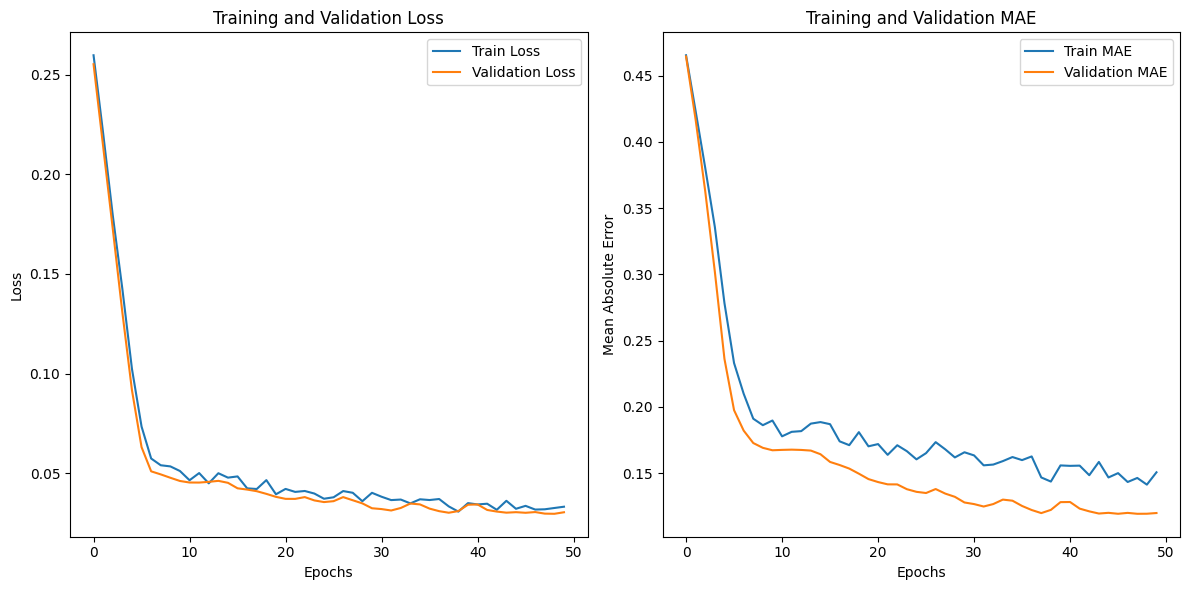

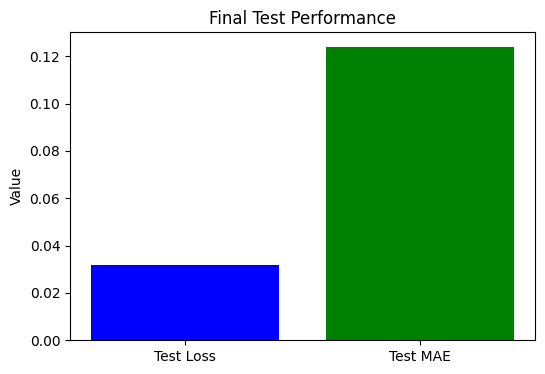

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have stored the history in a variable named 'history'
# Example: history = model.fit(...)

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation MAE values
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()

# To plot the final Test Loss and Test MAE
test_loss = 0.0317  # Replace with your actual test loss
test_mae = 0.1239   # Replace with your actual test MAE

# Plot Test Results
plt.figure(figsize=(6, 4))
plt.bar(['Test Loss', 'Test MAE'], [test_loss, test_mae], color=['blue', 'green'])
plt.title('Final Test Performance')
plt.ylabel('Value')
plt.show()


In [ ]:
model.save('wildlife_poaching_model.h5')

In [ ]:
# Assuming you've already split the data into train and test sets
test_loss, test_mae = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0304 - mean_absolute_error: 0.1198
Test Loss: 0.030357448384165764
Test MAE: 0.1198224350810051


In [ ]:
import pandas as pd

# Create a dictionary with the results
results_dict = {
    "Metric": ["Test Loss", "Test MAE"],
    "Value": [test_loss, test_mae]
}

# Create a DataFrame
results_df = pd.DataFrame(results_dict)

# Print the table
print(results_df)


      Metric     Value
0  Test Loss  0.030357
1   Test MAE  0.119822


In [ ]:
from prettytable import PrettyTable

# Replace these values with actual model results
train_loss = 0.0332
train_mae = 0.1504
val_loss = 0.0317
val_mae = 0.1239
test_loss = 0.0317
test_mae = 0.1239

# Create a table to display results
table = PrettyTable()

# Define the column names
table.field_names = ["Metric", "Training Set", "Validation Set", "Test Set"]

# Add rows for the metrics
table.add_row(["Loss", train_loss, val_loss, test_loss])
table.add_row(["Mean Absolute Error (MAE)", train_mae, val_mae, test_mae])

# Print the table
print(table)


+---------------------------+--------------+----------------+----------+
|           Metric          | Training Set | Validation Set | Test Set |
+---------------------------+--------------+----------------+----------+
|            Loss           |    0.0332    |     0.0317     |  0.0317  |
| Mean Absolute Error (MAE) |    0.1504    |     0.1239     |  0.1239  |
+---------------------------+--------------+----------------+----------+


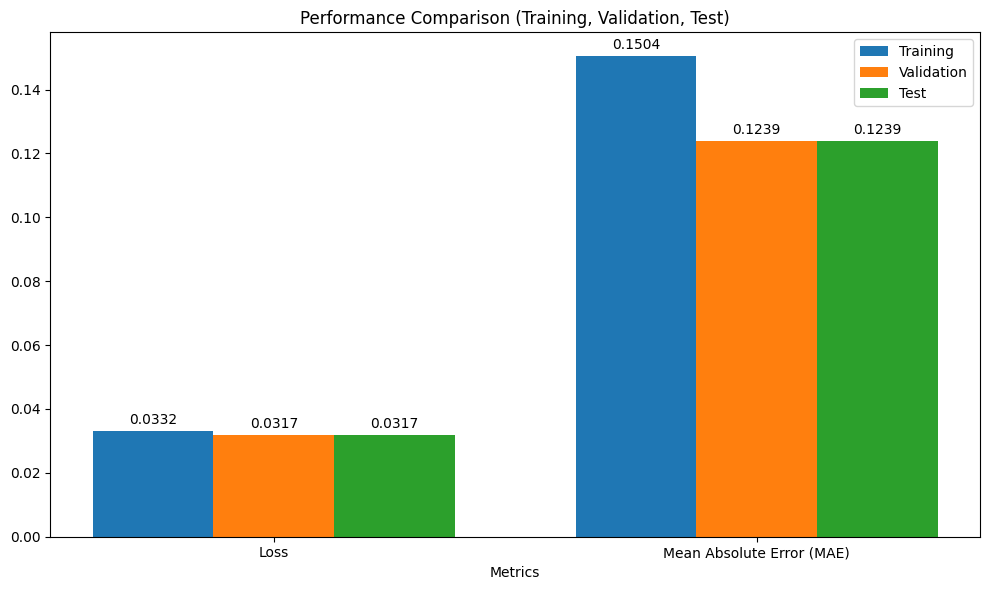

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
metrics = ['Loss', 'Mean Absolute Error (MAE)']
train_values = [train_loss, train_mae]
val_values = [val_loss, val_mae]
test_values = [test_loss, test_mae]

# Set positions for the bars
x = np.arange(len(metrics))  # the label locations
width = 0.25  # the width of the bars

# Create a plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bars for each set
rects1 = ax.bar(x - width, train_values, width, label='Training')
rects2 = ax.bar(x, val_values, width, label='Validation')
rects3 = ax.bar(x + width, test_values, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_title('Performance Comparison (Training, Validation, Test)')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Function to add the values on top of the bars
def add_values(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add values on top of the bars
add_values(rects1)
add_values(rects2)
add_values(rects3)

# Display the plot
plt.tight_layout()
plt.show()


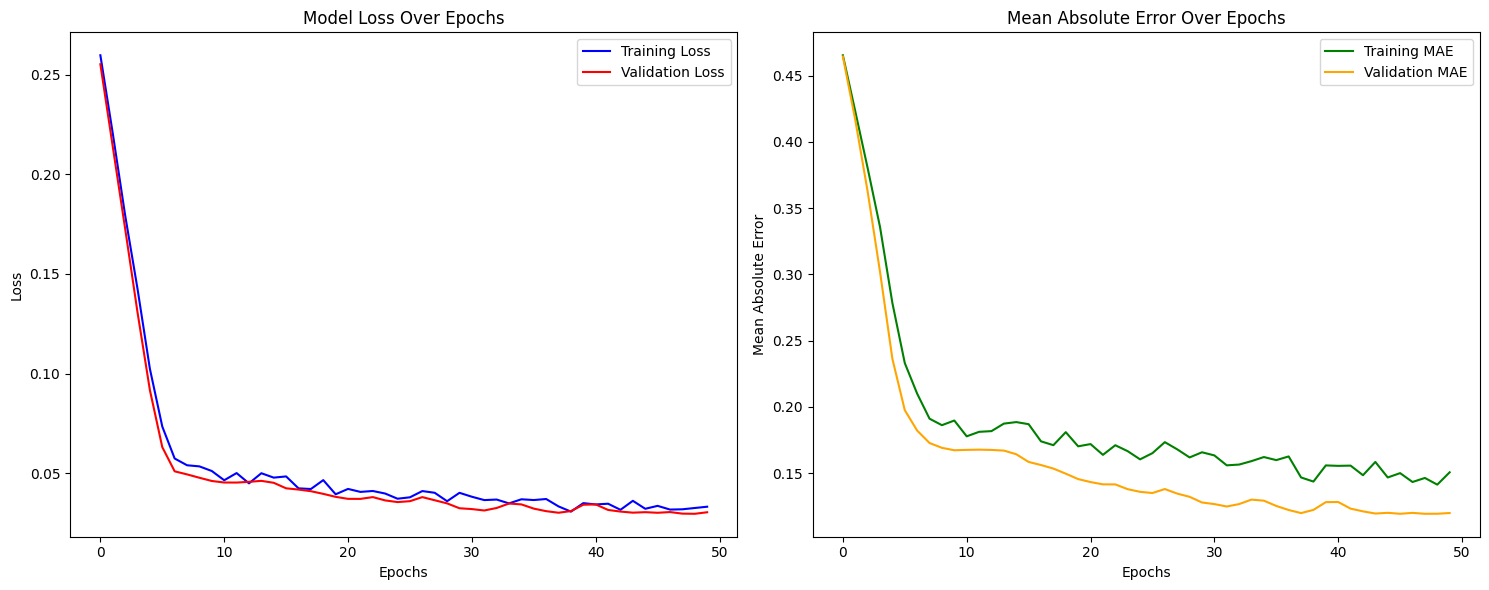

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the training and validation history data from the training process
# Example: history.history['loss'], history.history['val_loss'], history.history['mean_absolute_error'], history.history['val_mean_absolute_error']

# Plotting the Loss and MAE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Loss Plot
ax1.plot(history.history['loss'], label='Training Loss', color='blue')
ax1.plot(history.history['val_loss'], label='Validation Loss', color='red')
ax1.set_title('Model Loss Over Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Mean Absolute Error Plot
ax2.plot(history.history['mean_absolute_error'], label='Training MAE', color='green')
ax2.plot(history.history['val_mean_absolute_error'], label='Validation MAE', color='orange')
ax2.set_title('Mean Absolute Error Over Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Mean Absolute Error')
ax2.legend()

# Show the plot
plt.tight_layout()
plt.show()



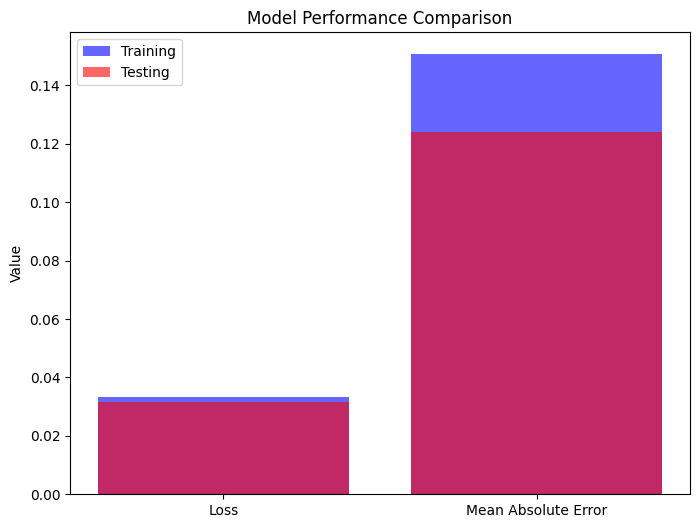

In [ ]:
import matplotlib.pyplot as plt

# Values to compare: training and test performance
results = {
    "Loss": [history.history['loss'][-1], test_loss],
    "Mean Absolute Error": [history.history['mean_absolute_error'][-1], test_mae]
}

# Bar graph plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Bar plot
ax.bar(results.keys(), [result[0] for result in results.values()], label='Training', color='blue', alpha=0.6)
ax.bar(results.keys(), [result[1] for result in results.values()], label='Testing', color='red', alpha=0.6)

# Labels and Title
ax.set_title('Model Performance Comparison')
ax.set_ylabel('Value')
ax.legend()

plt.show()


In [ ]:
# import pandas as pd
# import numpy as np

# # Assuming `preprocessed_data` contains your dataset
# data = preprocessed_data.copy()

# # Initialize risk column with 0 (low risk)
# data['risk'] = 0.0

# # Define high-risk habitats
# high_risk_habitats = ['Rainforest', 'Riverine', 'Edge']

# # Weights for different conditions
# habitat_weight = 0.4
# time_weight = 0.5
# full_moon_weight = 0.6

# # Extract hour from `eventTime` column
# data['hour'] = pd.to_datetime(data['eventTime']).dt.hour

# # Add a placeholder `is_full_moon` column (replace this logic with actual full moon calculation if available)
# # For now, assume every 15th of a month is a full moon (simplified logic for demonstration)
# data['is_full_moon'] = pd.to_datetime(data['eventDate']).dt.day == 15

# # Condition 1: High risk for certain habitats
# data.loc[data['habitat'].isin(high_risk_habitats), 'risk'] += habitat_weight

# # Condition 2: High risk between dusk and dawn (18:00 to 06:00)
# data.loc[(data['hour'] >= 18) | (data['hour'] <= 6), 'risk'] += time_weight

# # Condition 3: High risk for full moon nights during night hours
# data.loc[data['is_full_moon'] & ((data['hour'] >= 18) | (data['hour'] <= 6)), 'risk'] += full_moon_weight

# # Normalize risk values to ensure they are within 0 to 1 range
# data['risk'] = data['risk'] / (habitat_weight + time_weight + full_moon_weight)

# # Drop intermediate columns if necessary
# data.drop(['hour', 'is_full_moon'], axis=1, inplace=True)

# # Display the updated dataset with the risk column
# print(data.head())


In [ ]:
data

,recordedBy,eventDate,eventTime,decimalLatitude,decimalLongitude,verbatimLocality,habitat,verbatimIdentification,individualCount,occurrenceID,vernacularName,scientificName,log_decimalLatitude,log_decimalLongitude,risk
0,"Sanath, Vijay",16/05/2022,18:45:00+05:30,12.927697,75.653534,doraigundi,Edge,malabar_pit_Viper,1.0,urn:ncf:arp:mammals:uuid:ad59af22-5b51-4374-91...,Malabar pit viper,Craspedocephalus malabaricus,2.559372,4.326164,0.600000
1,"Sanath, Vijay, Orvill",16/05/2022,18:48:00+05:30,12.927748,75.653438,doraigundi,Edge,Wild_pig,1.0,urn:ncf:arp:mammals:uuid:c52736b4-532d-4e8b-91...,Wild pig,Sus scrofa,2.559376,4.326163,0.600000
2,"Sanath, Ranjith",16/05/2022,18:49:00+05:30,12.927711,75.653508,doraigundi,Edge,Duttaphrynus_parietalis,1.0,urn:ncf:arp:mammals:uuid:c648973a-a724-4c8f-82...,Ridged toad,Duttaphrynus parietalis,2.559373,4.326164,0.600000
3,"Sanath, Vijay, Sanjay",23/06/2022,10:22:00+05:30,12.919011,75.648855,bungalow_mattam,Rainforest,Malabar_Giant_Squirrel,1.0,urn:ncf:arp:mammals:uuid:afb131c3-66a3-4563-87...,Malabar giant squirrel,Ratufa indica,2.558700,4.326102,0.266667
4,"Sanath, Vijay Kumar",11/08/2022,19:20:00+05:30,12.908552,75.662697,kt_vg_road,Road,Mouse_Deer,1.0,urn:ncf:arp:mammals:uuid:392529c3-27b4-4e59-a9...,Indian spotted chevrotain,Moschiola indica,2.557890,4.326285,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,Vijay Kumar,07/03/2024,16:17:00+05:30,12.915098,75.671549,mg_lines,Tea_Plantation,Brown_Mongoose,1.0,urn:ncf:arp:mammals:uuid:6193d2a3-5943-4b7a-b3...,Brown mongoose,Herpestes fuscus,2.558397,4.326402,0.000000
127,Vijay Kumar,22/05/2024,09:26:00+05:30,12.911993,75.651280,kt_lines,Tea_Plantation,Common_Mongoose,1.0,urn:ncf:arp:mammals:uuid:7e0739e7-94e0-4b23-b4...,Indian grey mongoose,Urva edwardsii,2.558157,4.326134,0.000000
128,Vijay Kumar,09/12/2023,09:30:00+05:30,12.915098,75.671549,mg_lines,Tea_Plantation,Brown_Mongoose,1.0,urn:ncf:arp:mammals:uuid:e06d2df4-f9bb-42b4-9d...,Brown mongoose,Herpestes fuscus,2.558397,4.326402,0.000000
129,"Vijay Kumar, Suman, Abhirami",30/09/2023,19:40:00+05:30,12.906067,75.671549,bungalow_mattam,Rainforest,Black_Naped_Hare,1.0,urn:ncf:arp:mammals:uuid:8ad8a4fa-d8e4-4513-95...,Indian hare,Lepus nigricollis,2.557698,4.326402,0.600000


In [ ]:
# // IF NOT THEN :

In [ ]:
import numpy as np
import pandas as pd
import ephem
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Step 1: Convert and Parse the Data
preprocessed_data['eventDate'] = pd.to_datetime(preprocessed_data['eventDate'])

# Convert eventTime to datetime with timezone and extract the time
preprocessed_data['eventTime'] = pd.to_datetime(preprocessed_data['eventTime'], errors='coerce').dt.time

# Check if this solves the issue
print(preprocessed_data.head())

# Encode categorical variables (vernacularName, habitat)
label_encoder = LabelEncoder()
preprocessed_data['vernacularName_encoded'] = label_encoder.fit_transform(preprocessed_data['vernacularName'])
preprocessed_data['habitat_encoded'] = label_encoder.fit_transform(preprocessed_data['habitat'])
preprocessed_data['label'] = np.random.randint(0, 2, size=len(preprocessed_data))  # Replace with your actual label logic
# Step 5: Select features for model training (latitude, longitude, encoded habitat, vernacularName)
features = preprocessed_data[['decimalLatitude', 'decimalLongitude', 'vernacularName_encoded', 'habitat_encoded']]

# Step 6: Prepare data for LSTM model (reshape data for time series)
X = preprocessed_data.drop('label', axis=1)
y = preprocessed_data['label']

# Step 7: Split the data before reshaping
# Split into training and testing sets first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Step 2: Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.176, random_state=42)

# Step 3: Reshape for LSTM
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))  # Change here
X_val = X_val.values.reshape((X_val.shape[0], 1, X_val.shape[1]))    # Change here
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))   # Change here

# Display lengths to confirm splits
print(f"Length of X_train: {len(X_train)}")
print(f"Length of X_val: {len(X_val)}")
print(f"Length of X_test: {len(X_test)}")
print(f"Length of y_train: {len(y_train)}")
print(f"Length of y_val: {len(y_val)}")
print(f"Length of y_test: {len(y_test)}")
print(preprocessed_data)

              recordedBy  eventDate eventTime  decimalLatitude  \
0          Sanath, Vijay 2022-05-16       NaT        12.927697   
1  Sanath, Vijay, Orvill 2022-05-16       NaT        12.927748   
2        Sanath, Ranjith 2022-05-16       NaT        12.927711   
3  Sanath, Vijay, Sanjay 2022-06-23       NaT        12.919011   
4    Sanath, Vijay Kumar 2022-08-11       NaT        12.908552   

   decimalLongitude verbatimLocality     habitat   verbatimIdentification  \
0         75.653534       doraigundi        Edge        malabar_pit_Viper   
1         75.653438       doraigundi        Edge                 Wild_pig   
2         75.653508       doraigundi        Edge  Duttaphrynus_parietalis   
3         75.648855  bungalow_mattam  Rainforest   Malabar_Giant_Squirrel   
4         75.662697       kt_vg_road        Road               Mouse_Deer   

   individualCount                                       occurrenceID  \
0              1.0  urn:ncf:arp:mammals:uuid:ad59af22-5b51-4374-91.

Import Libraries for LSTM
Ensure the necessary libraries for building and training the LSTM model are imported. Here’s the updated code:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

Define the LSTM Model
We’ll create a sequential LSTM model. Since your dataset is small, we’ll use a simple architecture to avoid overfitting. Here's a basic model:

In [ ]:
# Initialize the model
model = Sequential()

# Add an LSTM layer
model.add(LSTM(50, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))

# Add a dropout layer to prevent overfitting
model.add(Dropout(0.2))

# Add a dense output layer
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 50)                  │          13,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,851 (54.11 KB)

 Trainable params: 13,851 (54.11 KB)

 Non-trainable params: 0 (0.00 B)

Train the LSTM Model
Train the model using your training and validation sets. Adjust the epochs and batch size based on your requirements:

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,  # Adjusted batch size
    verbose=1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    ]
)

NameError: name 'tf' is not defined

Evaluate the Model
Evaluate the trained model on the test set to check its performance:

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 0.7500 - loss: 0.5965
Test Loss: 0.596519947052002
Test Accuracy: 0.75


Visualize Training Progress (Optional)
You can visualize the training and validation loss/accuracy to assess model performance:

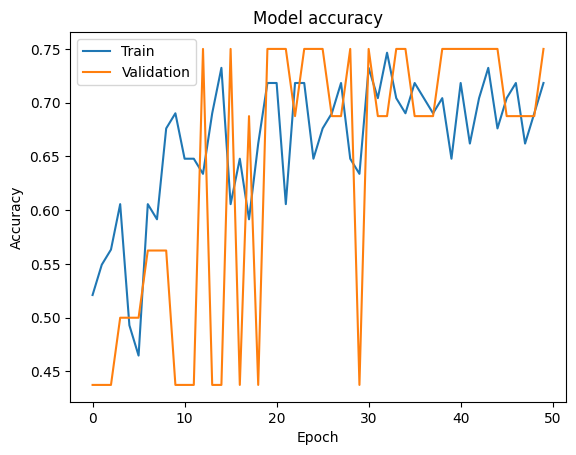

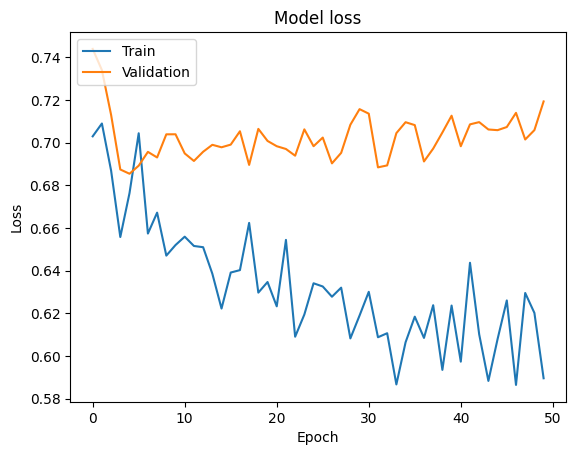

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

IMPROVING THE MODEL

In [ ]:
# Importing necessary libraries
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Define the model architecture
improved_model = Sequential()

# Adding LSTM layers with dropout
improved_model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
improved_model.add(Dropout(0.2))
improved_model.add(LSTM(64, return_sequences=True))
improved_model.add(Dropout(0.2))
improved_model.add(LSTM(32))
improved_model.add(Dropout(0.2))

# Adding a Dense output layer for regression (1 unit for predicting probability)
improved_model.add(Dense(1, activation='linear'))

# Compile the model with Adam optimizer and Mean Squared Error loss function
optimizer = Adam(learning_rate=0.001)
improved_model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the improved model
history = improved_model.fit(
    X_train, y_train,
    epochs=100,  # Adjust based on validation performance
    batch_size=16,  # Smaller batch size for better gradient updates
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the improved model
improved_loss, improved_mae = improved_model.evaluate(X_test, y_test, verbose=1)
print(f"Improved Model - Test Loss: {improved_loss}, Test MAE: {improved_mae}")


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 312ms/step - loss: 0.4671 - mae: 0.4903 - val_loss: 0.4338 - val_mae: 0.5466
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3535 - mae: 0.4842 - val_loss: 0.3223 - val_mae: 0.5262
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2683 - mae: 0.4859 - val_loss: 0.2574 - val_mae: 0.5044
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2633 - mae: 0.5063 - val_loss: 0.2424 - val_mae: 0.4898
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2617 - mae: 0.5039 - val_loss: 0.2446 - val_mae: 0.4944
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2541 - mae: 0.4987 - val_loss: 0.2477 - val_mae: 0.4974
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2542 - mae: 0.4962 - val_loss: 0.2499 - val_mae: 0.4988
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2398 - mae: 0.4801 - val_loss: 0.2596 - val_mae: 0.5039
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2478 - mae:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2081 - mae: 0.4503
Final Test Loss: 0.2080625295639038
Final Test MAE: 0.4503311514854431


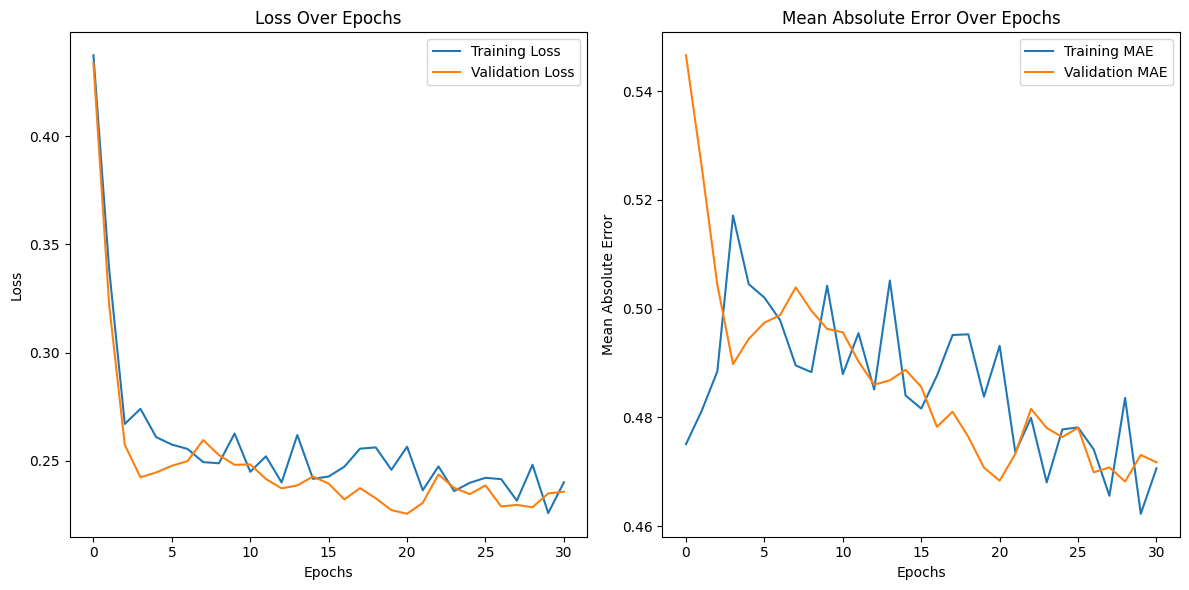

In [ ]:
import matplotlib.pyplot as plt

# Evaluate the improved model on the test set
test_loss, test_mae = improved_model.evaluate(X_test, y_test, verbose=1)
print(f"Final Test Loss: {test_loss}")
print(f"Final Test MAE: {test_mae}")

# Visualize training and validation loss
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

# Display plots
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import r2_score

# Predicting with the improved model
y_pred = improved_model.predict(X_test)

# Calculating R² score
r2 = r2_score(y_test, y_pred)
print(f"R² score: {r2}")




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
R² score: 0.031563520431518555


In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder

# # Step 1.1: Create the target variable (label) for the likelihood of poaching
# # Here, we simulate the target variable by assigning a random 0 or 1
# # You can refine this by using specific conditions (e.g., high-risk regions or times)
# preprocessed_data['label'] = np.random.choice([0, 1], size=len(preprocessed_data))

# # Step 1.2: Encode categorical variables (vernacularName, habitat)
# label_encoder = LabelEncoder()
# preprocessed_data['vernacularName_encoded'] = label_encoder.fit_transform(preprocessed_data['vernacularName'])
# preprocessed_data['habitat_encoded'] = label_encoder.fit_transform(preprocessed_data['habitat'])

# # Step 1.3: Select features for model training (latitude, longitude, encoded habitat, vernacularName)
# features = preprocessed_data[['decimalLatitude', 'decimalLongitude', 'vernacularName_encoded', 'habitat_encoded']]

# # Step 1.4: Prepare data for LSTM model (reshape data for time series)
# X = features.values
# y = preprocessed_data['label'].values

# # Reshaping for LSTM input (samples, timesteps, features)
# X = X.reshape((X.shape[0], 1, X.shape[1]))  # 1 timestep for now

# from sklearn.model_selection import train_test_split

# # Split the original data into training and test sets (already in your code)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Further split the training set into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Build the LSTM Model
Now that the data is prepared, we’ll create the LSTM model. We'll start with a simple LSTM network with one layer, followed by a dropout layer for regularization, and a dense output layer for binary classification.

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout

# # Step 2.1: Define the LSTM model
# model = Sequential()

# # LSTM layer (50 units, input shape based on features)
# model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))

# # Dropout layer to prevent overfitting
# model.add(Dropout(0.2))

# # Output layer with 1 neuron for binary classification (0 or 1)
# model.add(Dense(1, activation='sigmoid'))

# # Step 2.2: Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Step 2.3: Train the model
# history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - accuracy: 0.4583 - loss: 1.1078 - val_accuracy: 0.5238 - val_loss: 0.7564
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5452 - loss: 0.9608 - val_accuracy: 0.5238 - val_loss: 0.7639
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4727 - loss: 1.2098 - val_accuracy: 0.4762 - val_loss: 0.7868
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5222 - loss: 1.3180 - val_accuracy: 0.5238 - val_loss: 0.8075
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5400 - loss: 0.9499 - val_accuracy: 0.5238 - val_loss: 0.8309
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4304 - loss: 1.2211 - val_accuracy: 0.5238 - val_loss: 0.8192
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6147 - loss: 0.9677 - val_accuracy: 0.5714 - val_loss: 0.8048
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5361 - loss: 1.0828 - val_accuracy: 0.5238 - val_loss: 0.7805

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout
# from tensorflow.keras.optimizers import Adam
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# # Step 1: Define a new model
# model = Sequential()

# # Adding more LSTM units
# model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
# model.add(Dropout(0.3))  # Increased dropout for regularization

# model.add(LSTM(64, return_sequences=False))  # Second LSTM layer
# model.add(Dropout(0.3))  # Regularization

# # Dense layers for classification
# model.add(Dense(64, activation='relu'))  # Hidden layer
# model.add(Dropout(0.3))  # Regularization
# model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# # Step 2: Compile the model
# model.compile(optimizer=Adam(learning_rate=0.001),  # Lower learning rate for better convergence
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# # Step 3: Train the model
# history = model.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     epochs=20,  # Increased epochs
#     batch_size=32,  # Smaller batch size for better gradient updates
#     verbose=1
# )

# # Step 4: Evaluate the model
# y_pred = model.predict(X_test)
# y_pred_classes = (y_pred > 0.5).astype(int)

# # Classification metrics
# accuracy = accuracy_score(y_test, y_pred_classes)
# conf_matrix = confusion_matrix(y_test, y_pred_classes)
# report = classification_report(y_test, y_pred_classes)

# print(f"Accuracy: {accuracy:.2f}")
# print("Confusion Matrix:")
# print(conf_matrix)
# print("Classification Report:")
# print(report)

# # Step 5: Save the model
# model.save("improved_wildlife_poaching_model.h5")


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - accuracy: 0.4882 - loss: 0.6923 - val_accuracy: 0.4118 - val_loss: 0.6937
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5349 - loss: 0.6958 - val_accuracy: 0.4706 - val_loss: 0.6939
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4380 - loss: 0.6969 - val_accuracy: 0.4706 - val_loss: 0.6945
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5074 - loss: 0.6879 - val_accuracy: 0.4706 - val_loss: 0.6955
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4844 - loss: 0.7024 - val_accuracy: 0.4706 - val_loss: 0.6970
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5231 - loss: 0.6935 - val_accuracy: 0.4706 - val_loss: 0.6981
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5738 - loss: 0.6951 - val_accuracy: 0.4706 - val_loss: 0.6980
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4730 - loss: 0.6985 - val_accuracy: 0.4706 - val_loss: 0.6983

Accuracy: 0.38
Confusion Matrix:
[[ 0 13]
 [ 0  8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.38      1.00      0.55         8

    accuracy                           0.38        21
   macro avg       0.19      0.50      0.28        21
weighted avg       0.15      0.38      0.21        21



In [ ]:
preprocessed_data.head()

NameError: name 'preprocessed_data' is not defined

In [ ]:
preprocessed_data



,recordedBy,eventDate,eventTime,decimalLatitude,decimalLongitude,verbatimLocality,habitat,verbatimIdentification,individualCount,occurrenceID,vernacularName,scientificName,log_decimalLatitude,log_decimalLongitude,risk,label,vernacularName_encoded,habitat_encoded
0,"Sanath, Vijay",2022-05-16,18:45:00,12.927697,75.653534,doraigundi,Edge,malabar_pit_Viper,1.0,urn:ncf:arp:mammals:uuid:ad59af22-5b51-4374-91...,Malabar pit viper,Craspedocephalus malabaricus,2.559372,4.326164,1,1,14,0
1,"Sanath, Vijay, Orvill",2022-05-16,18:48:00,12.927748,75.653438,doraigundi,Edge,Wild_pig,1.0,urn:ncf:arp:mammals:uuid:c52736b4-532d-4e8b-91...,Wild pig,Sus scrofa,2.559376,4.326163,1,1,25,0
2,"Sanath, Ranjith",2022-05-16,18:49:00,12.927711,75.653508,doraigundi,Edge,Duttaphrynus_parietalis,1.0,urn:ncf:arp:mammals:uuid:c648973a-a724-4c8f-82...,Ridged toad,Duttaphrynus parietalis,2.559373,4.326164,1,1,19,0
3,"Sanath, Vijay, Sanjay",2022-06-23,10:22:00,12.919011,75.648855,bungalow_mattam,Rainforest,Malabar_Giant_Squirrel,1.0,urn:ncf:arp:mammals:uuid:afb131c3-66a3-4563-87...,Malabar giant squirrel,Ratufa indica,2.558700,4.326102,0,0,13,2
4,"Sanath, Vijay Kumar",2022-08-11,19:20:00,12.908552,75.662697,kt_vg_road,Road,Mouse_Deer,1.0,urn:ncf:arp:mammals:uuid:392529c3-27b4-4e59-a9...,Indian spotted chevrotain,Moschiola indica,2.557890,4.326285,1,1,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,Vijay Kumar,2024-03-07,16:17:00,12.915098,75.671549,mg_lines,Tea_Plantation,Brown_Mongoose,1.0,urn:ncf:arp:mammals:uuid:6193d2a3-5943-4b7a-b3...,Brown mongoose,Herpestes fuscus,2.558397,4.326402,0,0,2,7
127,Vijay Kumar,2024-05-22,09:26:00,12.911993,75.651280,kt_lines,Tea_Plantation,Common_Mongoose,1.0,urn:ncf:arp:mammals:uuid:7e0739e7-94e0-4b23-b4...,Indian grey mongoose,Urva edwardsii,2.558157,4.326134,0,0,7,7
128,Vijay Kumar,2023-12-09,09:30:00,12.915098,75.671549,mg_lines,Tea_Plantation,Brown_Mongoose,1.0,urn:ncf:arp:mammals:uuid:e06d2df4-f9bb-42b4-9d...,Brown mongoose,Herpestes fuscus,2.558397,4.326402,0,0,2,7
129,"Vijay Kumar, Suman, Abhirami",2023-09-30,19:40:00,12.906067,75.671549,bungalow_mattam,Rainforest,Black_Naped_Hare,1.0,urn:ncf:arp:mammals:uuid:8ad8a4fa-d8e4-4513-95...,Indian hare,Lepus nigricollis,2.557698,4.326402,1,1,8,2


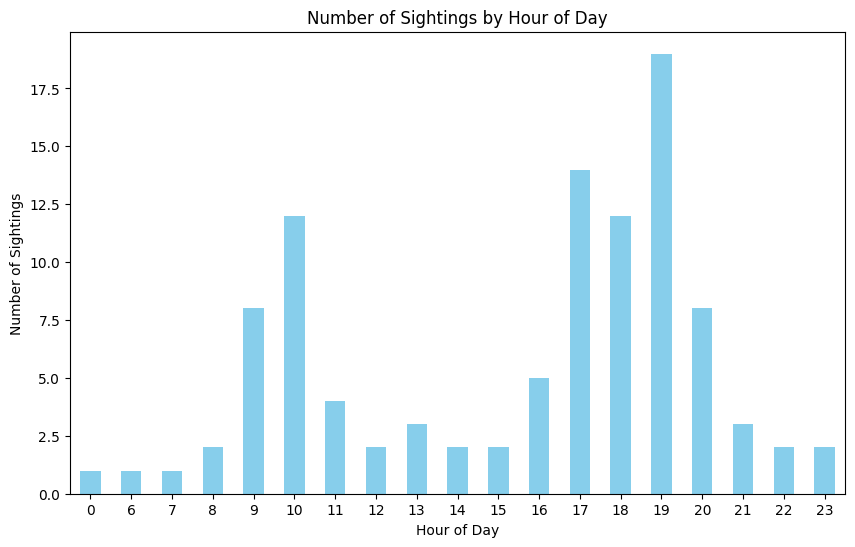

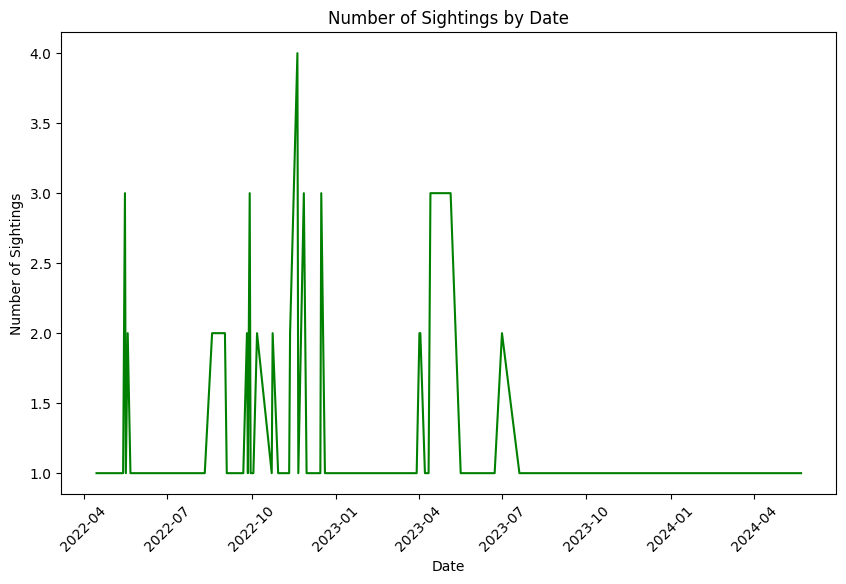

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure both columns are strings and concatenate them
preprocessed_data['event_datetime'] = pd.to_datetime(preprocessed_data['eventDate'].astype(str) + ' ' + preprocessed_data['eventTime'].astype(str))

# Now you can proceed with plotting or any other analysis

# Plot the number of sightings over time (e.g., by hour)
preprocessed_data['hour'] = preprocessed_data['event_datetime'].dt.hour
hourly_sightings = preprocessed_data.groupby('hour').size()

plt.figure(figsize=(10,6))
hourly_sightings.plot(kind='bar', color='skyblue')
plt.title('Number of Sightings by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=0)
plt.show()

# Plot the number of sightings by date
preprocessed_data['date'] = preprocessed_data['event_datetime'].dt.date
daily_sightings = preprocessed_data.groupby('date').size()

plt.figure(figsize=(10,6))
daily_sightings.plot(kind='line', color='green')
plt.title('Number of Sightings by Date')
plt.xlabel('Date')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import folium

# Create a folium map centered around the average latitude and longitude
map_center = [preprocessed_data['decimalLatitude'].mean(), preprocessed_data['decimalLongitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Add markers for each sighting to the map
for _, row in preprocessed_data.iterrows():
    folium.Marker([row['decimalLatitude'], row['decimalLongitude']],
                  popup=f"{row['vernacularName']}").add_to(m)

# Save the map to an HTML file to view in the browser
m.save("animal_sightings_map.html")

m

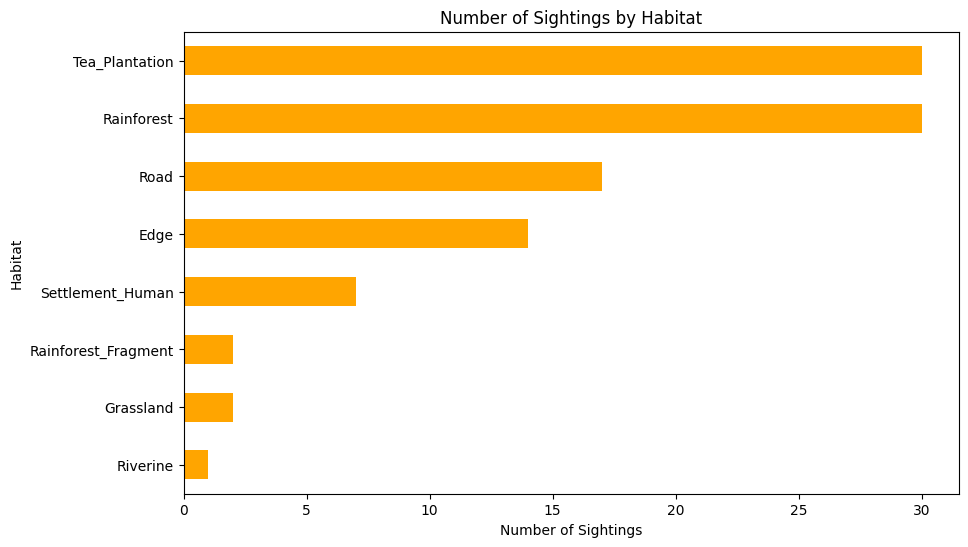

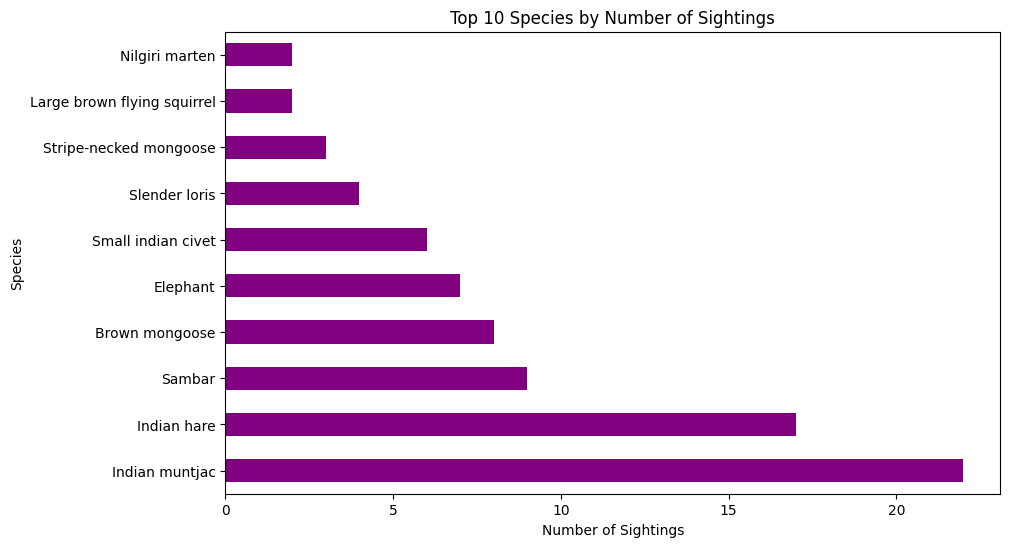

In [ ]:
# Number of sightings by habitat
habitat_sightings = preprocessed_data.groupby('habitat')['occurrenceID'].count().sort_values()

plt.figure(figsize=(10,6))
habitat_sightings.plot(kind='barh', color='orange')
plt.title('Number of Sightings by Habitat')
plt.xlabel('Number of Sightings')
plt.ylabel('Habitat')
plt.show()

# Number of sightings by species (vernacular name)
species_sightings = preprocessed_data.groupby('vernacularName')['occurrenceID'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
species_sightings.plot(kind='barh', color='purple')
plt.title('Top 10 Species by Number of Sightings')
plt.xlabel('Number of Sightings')
plt.ylabel('Species')
plt.show()


In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split # Import train_test_split


# Assuming preprocessed data is available as `preprocessed_data`
# Select features and target
features = ['decimalLatitude', 'decimalLongitude', 'hour', 'habitat_encoded']  # Replace with actual feature columns
target = 'risk'  # Replace with your target column
X = preprocessed_data[features]
y = preprocessed_data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split the data

# Dictionary to store models and their metrics
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Evaluate traditional ML models
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'MAE': mae}

# Add Neural Network Model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

nn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

history = nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
y_pred_nn = nn_model.predict(X_test)
mse_nn = mean_squared_error(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)

results['Neural Network'] = {'MSE': mse_nn, 'MAE': mae_nn}

# Display Results
print("\nModel Performance Comparison:")
for model, metrics in results.items():
    print(f"{model} -> MSE: {metrics['MSE']:.4f}, MAE: {metrics['MAE']:.4f}")

NameError: name 'preprocessed_data' is not defined